In [54]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [55]:
%%html
<div id="toc"></div>

In [56]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [57]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [58]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [59]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [60]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [61]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [62]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Wed Dec 30 20:50:23 2020 +0100**

In [63]:
plt.rcParams['figure.figsize'] = [20, 7]

In [64]:
import matplotlib.ticker as ticker

def beautify_graph(ax):
    plt.rcParams['figure.figsize'] = [20, 12]
    plt.xticks(rotation=90)
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='both', length=14)
    #ax.locator_params(axis='x', nbins=10)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=60))
    
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [65]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [66]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data['CASI PER TAMPONE (%)']= (incremental_data['totale_casi']/incremental_data['tamponi']*100).round(2)

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [67]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
30-Dec-20        16202           -4333    19960       575         -117   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  \
                                                                             
30-Dec-20         -96           -21          -4216          -4333   169045   

           CASI PER TAMPONE (%)  
                                 
30-Dec-20                  9.58

### I dati cumulati di oggi

In [68]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
30-Dec-20      2083689         564395  1445690     73604        26094   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.   TAMPONI  
                                                              
30-Dec-20       23566          2528         538301  26412603

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

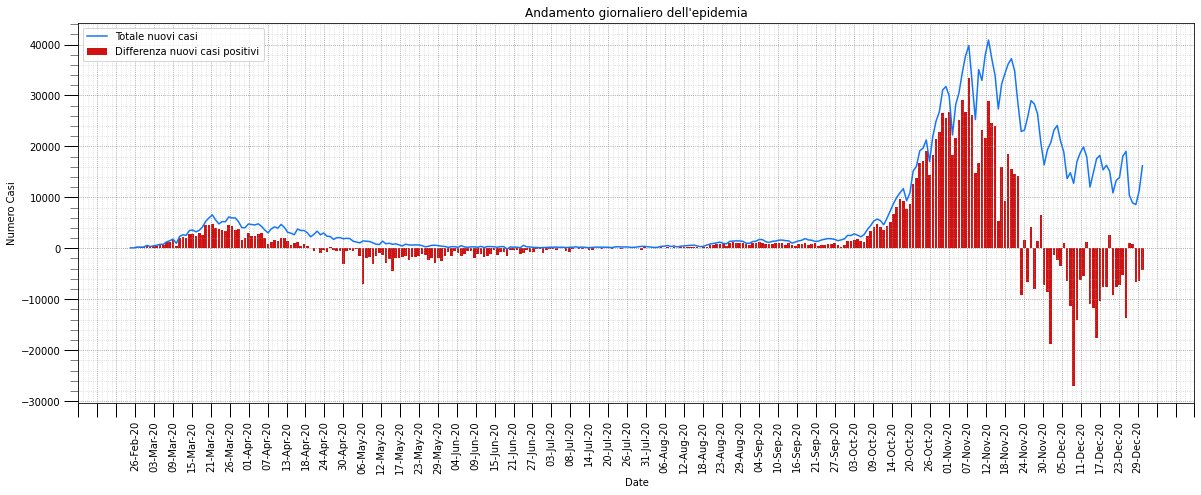

In [69]:
date = incremental_data['data'].to_numpy()
total_cases = incremental_data['totale_casi'].to_numpy()
new_positives = incremental_data['nuovi_attualmente_positivi'].to_numpy()

fig, ax = plt.subplots()

colors = COL_TOTALE_CASI
legends = "Totale nuovi casi"
ax.plot(date, total_cases,color=colors, label=legends)

colors = COL_DIFF_POSITIVI
legends = "Differenza nuovi casi positivi"
ax.bar(date, new_positives, color=colors,  label=legends)

ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")

#ax.set_ylim(-7000,42000)

beautify_graph(ax)


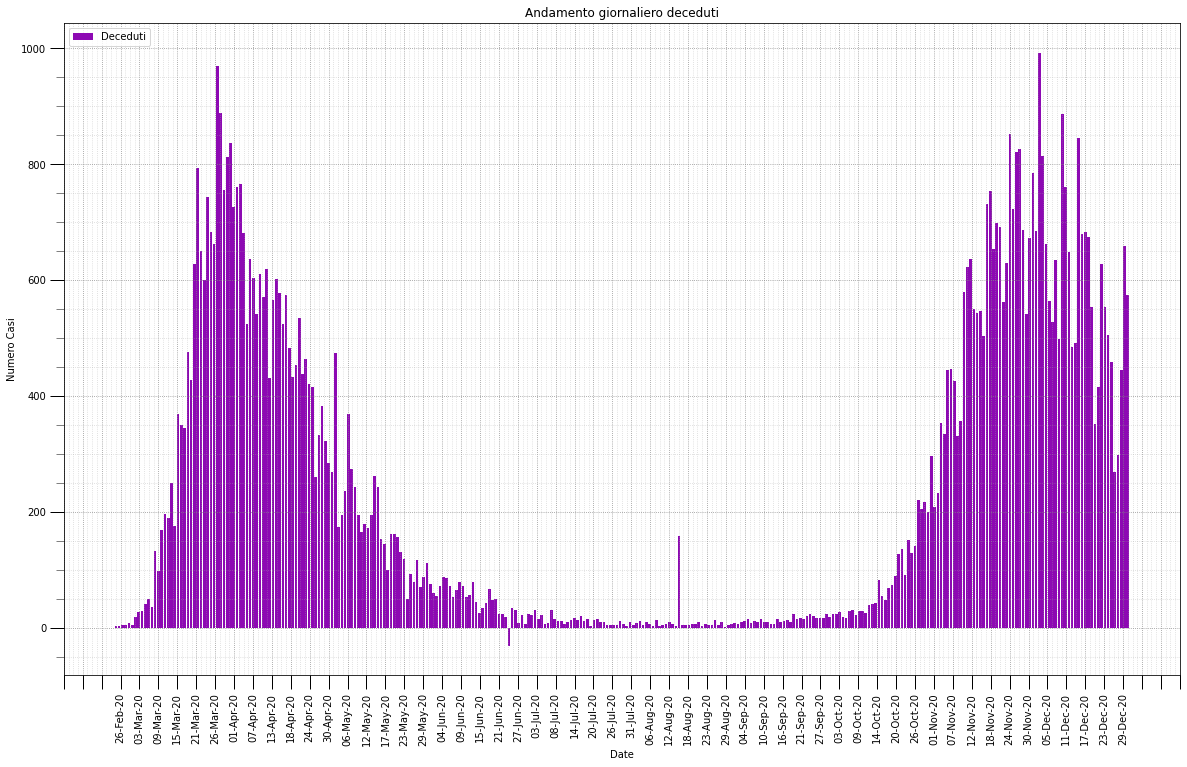

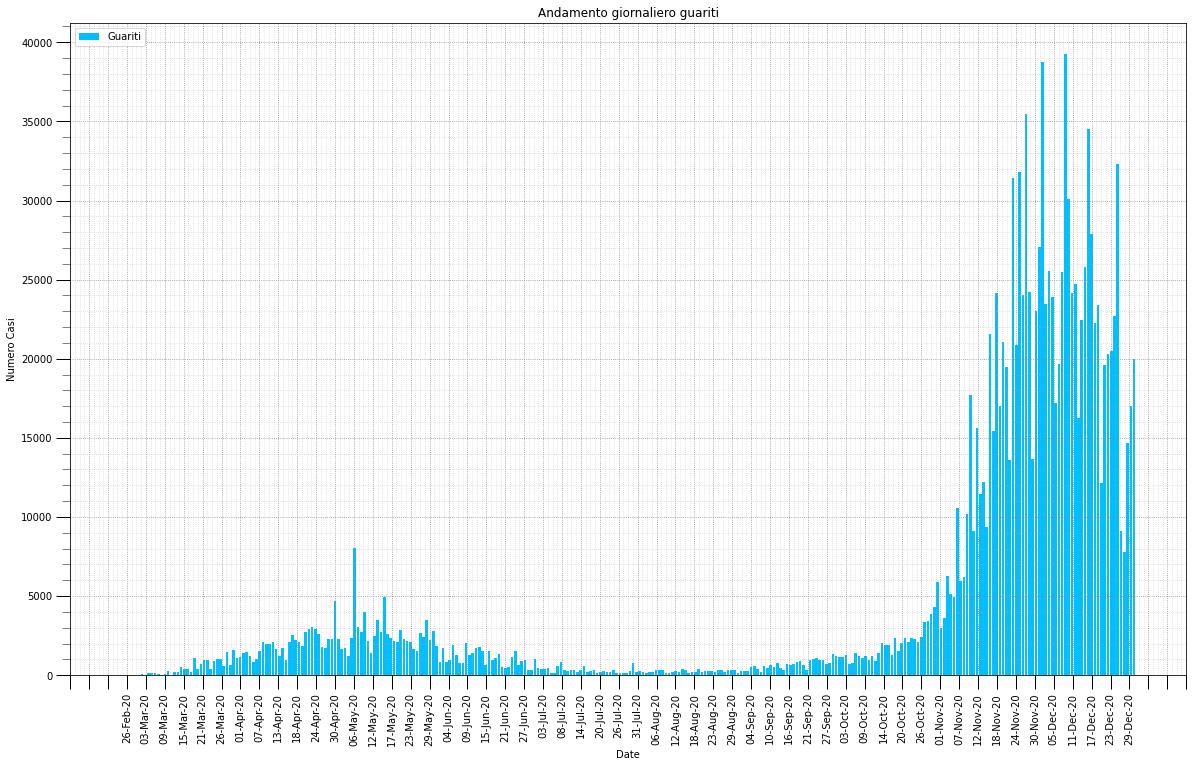

In [70]:
date = incremental_data['data'].to_numpy()
died = incremental_data['deceduti'].to_numpy()
recovered = incremental_data['dimessi_guariti'].to_numpy()

fig, ax = plt.subplots()
colors = COL_DECEDUTI
legends = "Deceduti"
ax.bar(date, died,color=colors, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero deceduti")
beautify_graph(ax)

fig, ax = plt.subplots()
colors = COL_GUARITI
legends = "Guariti"
ax.bar(date, recovered, color=colors,  label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero guariti")
beautify_graph(ax)


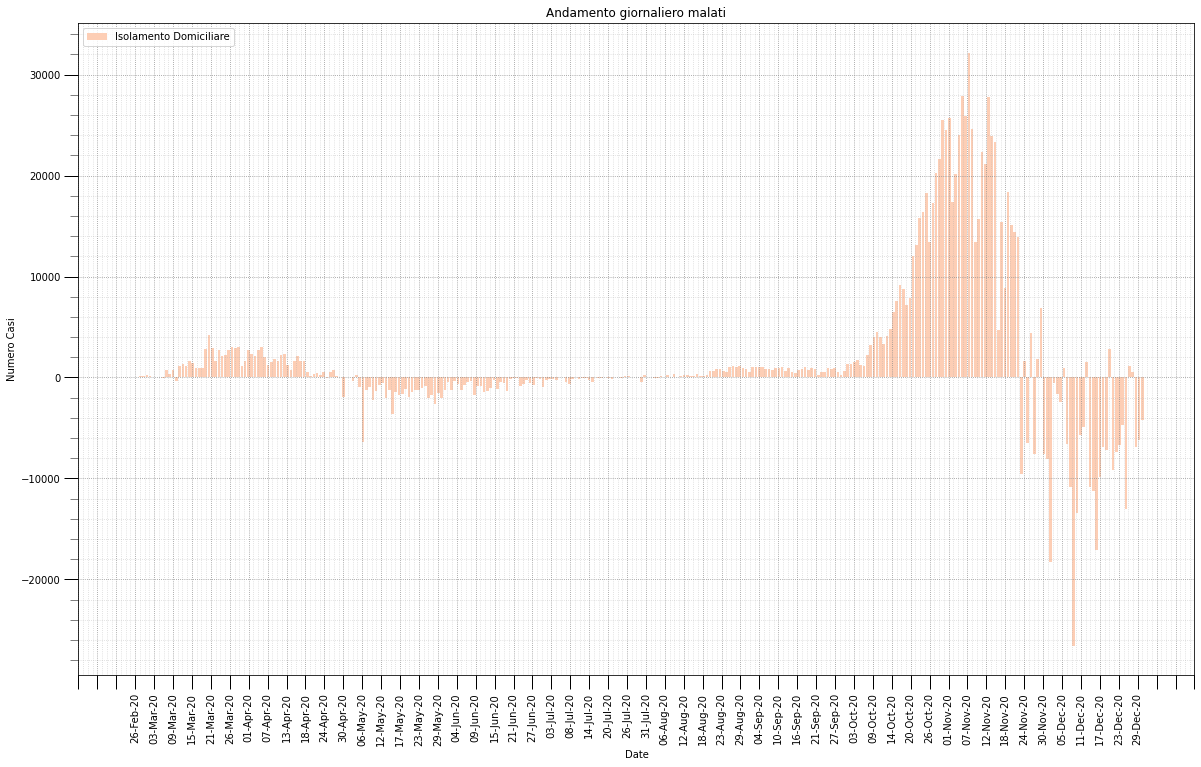

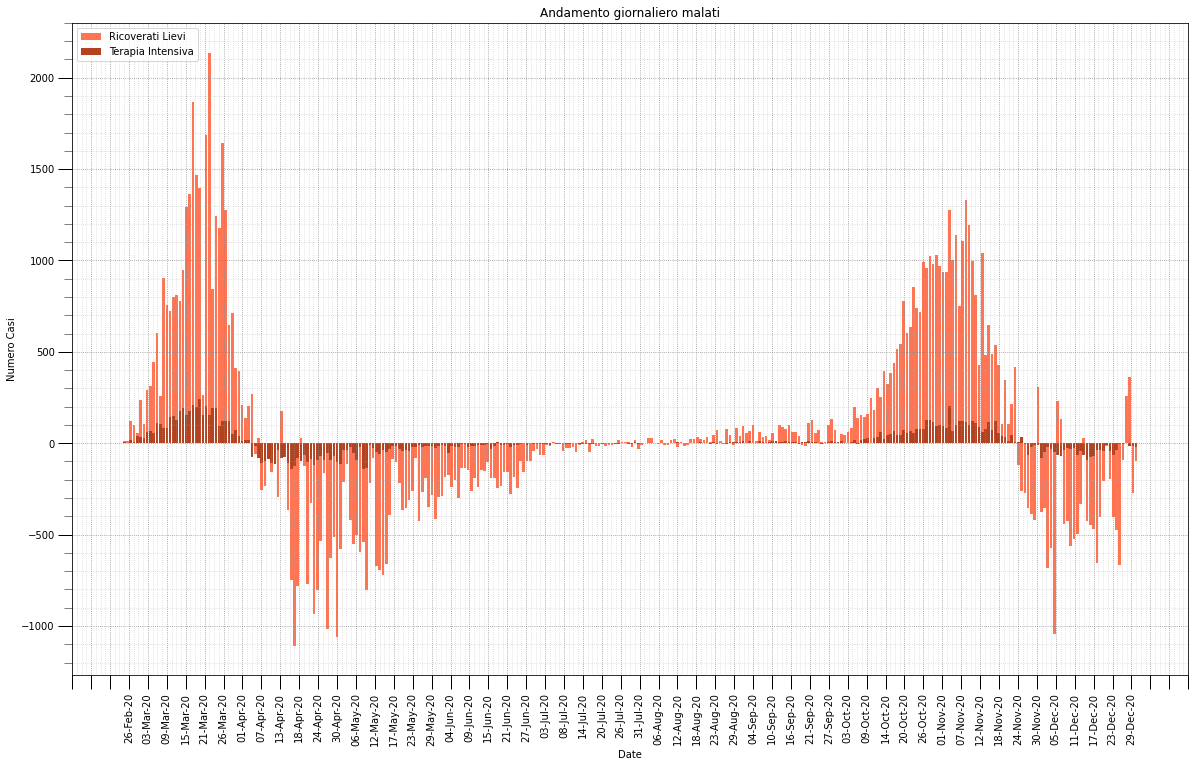

In [71]:
hospidalized =incremental_data['ricoverati_con_sintomi'].to_numpy()
intensive =incremental_data['terapia_intensiva'].to_numpy()
home =incremental_data['isolamento_domiciliare'].to_numpy()


fig, ax = plt.subplots()

colors = COL_ISOLAMENTO_DOMICILIARE
legends = "Isolamento Domiciliare"
ax.bar(date, home, color=colors,  label=legends)

ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero malati")

beautify_graph(ax)

fig, ax = plt.subplots()


colors = COL_RICOVERATI
legends = "Ricoverati Lievi"
ax.bar(date, hospidalized, color=colors,  label=legends)

colors = COL_TERAPIA_INTENSIVA
legends = "Terapia Intensiva"
ax.bar(date, intensive, color=colors,  label=legends)


ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero malati")
beautify_graph(ax)


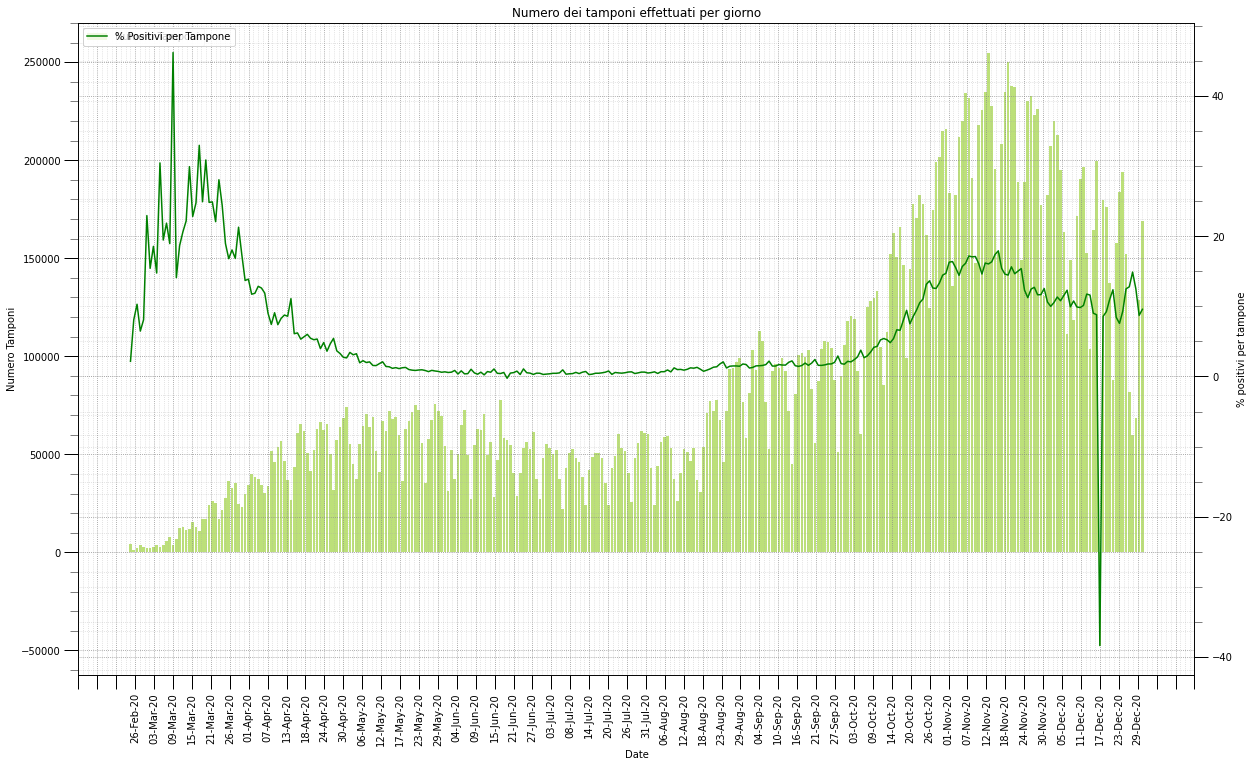

In [72]:
swabs =incremental_data['tamponi'].to_numpy()
swabs_percent =incremental_data['CASI PER TAMPONE (%)'].to_numpy()

fig, ax = plt.subplots()

colors = COL_TAMPONI
legends = "Numero Tamponi"
ax.bar(date, swabs, color=colors,  label=legends)
ax.set_title("Numero dei tamponi effettuati per giorno")
ax.set_ylabel('Numero Tamponi')
plt.xticks(rotation=90)
ax2 = ax.twinx() 
colors = COL_AVG
legends = "% Positivi per Tampone"
ax2.plot(date, swabs_percent, color=colors,  label=legends)

ax2.set_ylabel('% positivi per tampone')
ax2.axes.get_xaxis().set_visible(False)


beautify_graph(ax)
beautify_graph(ax2)


#### I dati incrementali degli ultimi 10 giorni

In [73]:

show_table(incremental_data.rename(columns=NAME_LABELS),15).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
16-Dec-20        17568          -17607    34495       680         -522   
17-Dec-20        18233          -10363    27913       683         -541   
18-Dec-20        15401           -7545    22272       674         -694   
19-Dec-20        16305           -7632    23384       553         -440   
20-Dec-20        15102            2594    12156       352         -247   
21-Dec-20        10869           -9178    19632       415          -25   
22-Dec-20        13316           -7627    20315       628         -241   
23-Dec-20        13908           -7139    20494       553         -465   
24-Dec-20        18039           -5184    22718       505         -511   
25-Dec-20        19037          -13746    32324       459         -673   
26-Dec-20        10429            1057     9104       268          -94   
27-Dec-20         8913             817     7798       298          259   
28-Dec-20         8581           -6539    14675       445          346   
29-Dec-20        11210           -6493    17044       659         -286   
30-Dec-20        16202           -4333    19960       575         -117   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  \
                                                              
16-Dec-20        -445           -77         -17085   199489   
17-Dec-20        -470           -71          -9822   -47510   
18-Dec-20        -658           -36          -6851   179800   
19-Dec-20        -405           -35          -7192   176185   
20-Dec-20        -206           -41           2841   137420   
21-Dec-20         -13           -12          -9153    87889   
22-Dec-20        -197           -44          -7386   157705   
23-Dec-20        -402           -63          -6674   183864   
24-Dec-20        -476           -35          -4673   193777   
25-Dec-20        -668            -5         -13073   152334   
26-Dec-20         -90            -4           1151    81564   
27-Dec-20         259             0            558    59879   
28-Dec-20         361           -15          -6885    68681   
29-Dec-20        -270           -16          -6207   128740   
30-Dec-20         -96           -21          -4216   169045   

           CASI PER TAMPONE (%)  
                                 
16-Dec-20                  8.81  
17-Dec-20                -38.38  
18-Dec-20                  8.57  
19-Dec-20                  9.25  
20-Dec-20                 10.99  
21-Dec-20                 12.37  
22-Dec-20                  8.44  
23-Dec-20                  7.56  
24-Dec-20                  9.31  
25-Dec-20                 12.50  
26-Dec-20                 12.79  
27-Dec-20                 14.89  
28-Dec-20                 12.49  
29-Dec-20                  8.71  
30-Dec-20                  9.58

#### I dati cumulati degli ultimi 10 giorni

In [74]:
show_table(national_trend.rename(columns = NAME_LABELS),15).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
16-Dec-20      1888144         645706  1175901     66537        29823   
17-Dec-20      1906377         635343  1203814     67220        29282   
18-Dec-20      1921778         627798  1226086     67894        28588   
19-Dec-20      1938083         620166  1249470     68447        28148   
20-Dec-20      1953185         622760  1261626     68799        27901   
21-Dec-20      1964054         613582  1281258     69214        27876   
22-Dec-20      1977370         605955  1301573     69842        27635   
23-Dec-20      1991278         598816  1322067     70395        27170   
24-Dec-20      2009317         593632  1344785     70900        26659   
25-Dec-20      2028354         579886  1377109     71359        25986   
26-Dec-20      2038783         580943  1386213     71627        25892   
27-Dec-20      2047696         581760  1394011     71925        26151   
28-Dec-20      2056277         575221  1408686     72370        26497   
29-Dec-20      2067487         568728  1425730     73029        26211   
30-Dec-20      2083689         564395  1445690     73604        26094   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.   TAMPONI  
                                                              
16-Dec-20       26897          2926         615883  24683230  
17-Dec-20       26427          2855         606061  24635720  
18-Dec-20       25769          2819         599210  24815520  
19-Dec-20       25364          2784         592018  24991705  
20-Dec-20       25158          2743         594859  25129125  
21-Dec-20       25145          2731         585706  25217014  
22-Dec-20       24948          2687         578320  25374719  
23-Dec-20       24546          2624         571646  25558583  
24-Dec-20       24070          2589         566973  25752360  
25-Dec-20       23402          2584         553900  25904694  
26-Dec-20       23312          2580         555051  25986258  
27-Dec-20       23571          2580         555609  26046137  
28-Dec-20       23932          2565         548724  26114818  
29-Dec-20       23662          2549         542517  26243558  
30-Dec-20       23566          2528         538301  26412603

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

Text(0.5, 1.0, 'Andamento cumulato pandemia (scala logaritmica)')

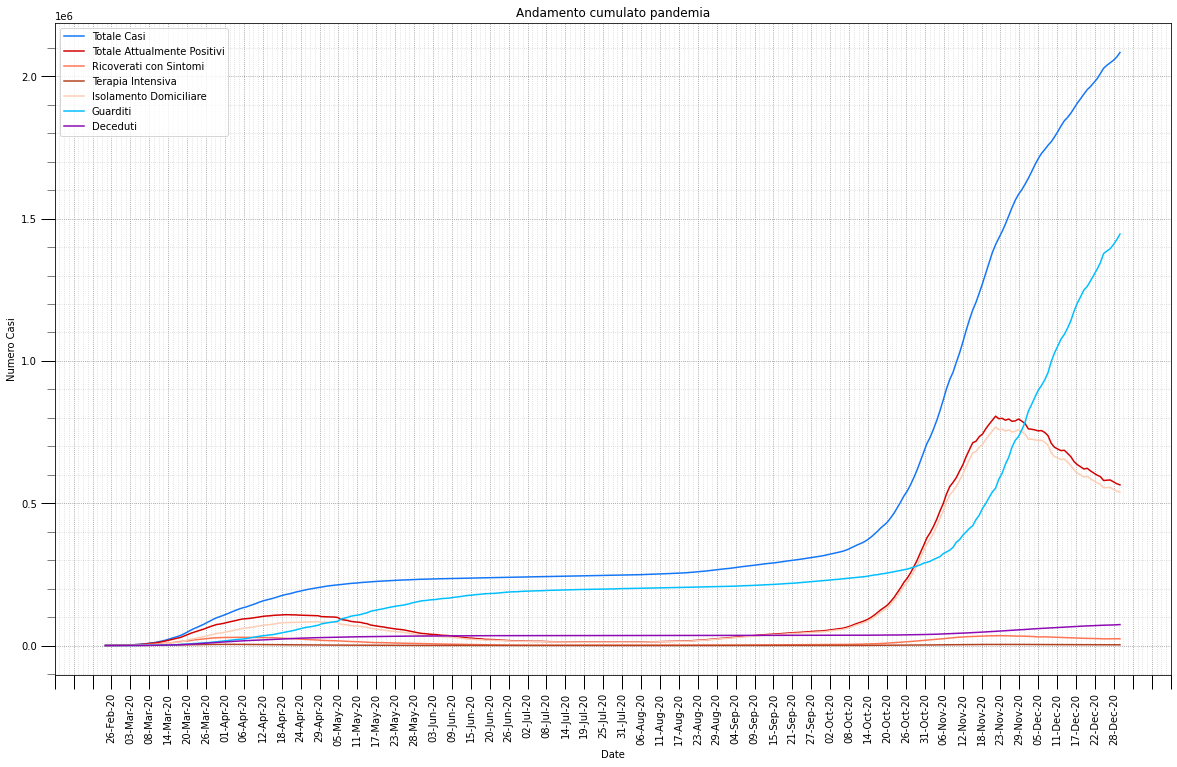

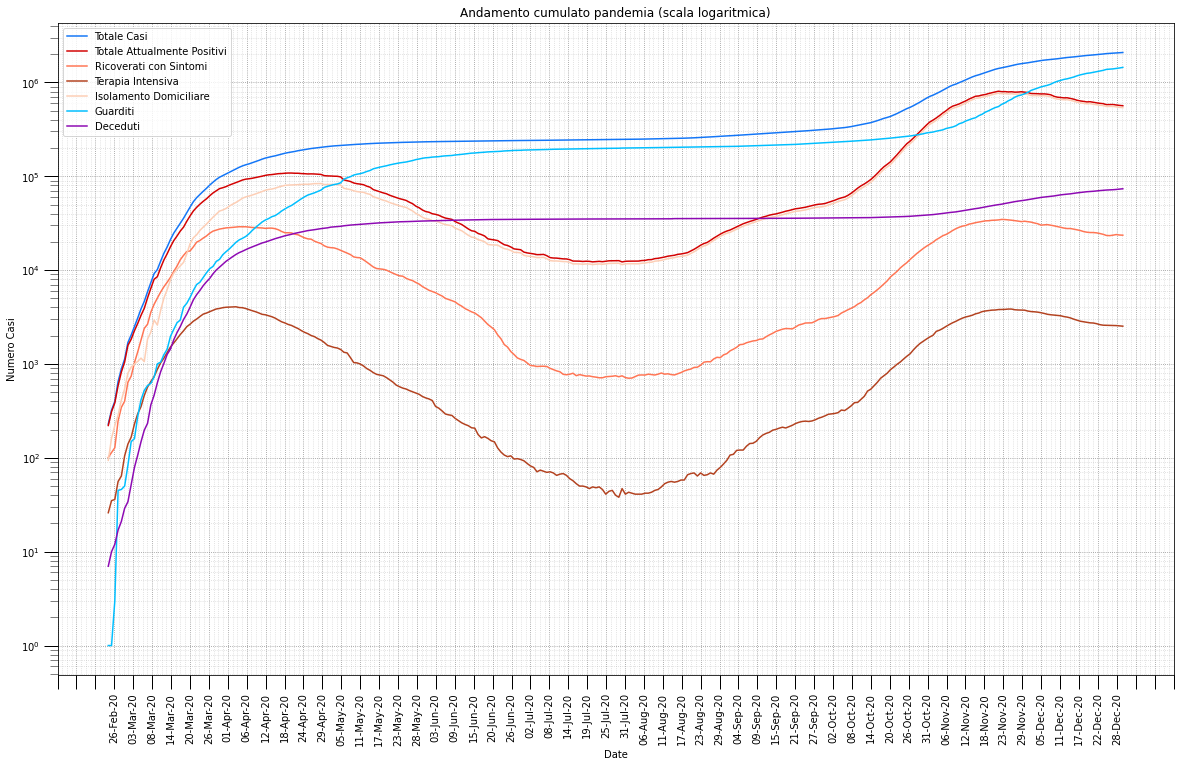

In [75]:
date = national_trend['data'].to_numpy()
totale_casi =national_trend['totale_casi'].to_numpy()
totale_attualmente_positivi =national_trend['totale_attualmente_positivi'].to_numpy()
ricoverati_con_sintomi =national_trend['ricoverati_con_sintomi'].to_numpy()
terapia_intensiva =national_trend['terapia_intensiva'].to_numpy()
isolamento_domiciliare =national_trend['isolamento_domiciliare'].to_numpy()
dimessi_guariti =national_trend['dimessi_guariti'].to_numpy()
deceduti =national_trend['deceduti'].to_numpy()

def plot_national_data():
    colors = COL_TOTALE_CASI
    legends = "Totale Casi"
    ax.plot(date, totale_casi, color=colors,  label=legends)

    colors = COL_ATTUALMENTE_POSITIVI
    legends = "Totale Attualmente Positivi"
    ax.plot(date, totale_attualmente_positivi, color=colors,  label=legends)

    colors = COL_RICOVERATI
    legends = "Ricoverati con Sintomi"
    ax.plot(date, ricoverati_con_sintomi, color=colors,  label=legends)

    colors = COL_TERAPIA_INTENSIVA
    legends = "Terapia Intensiva"
    ax.plot(date, terapia_intensiva, color=colors,  label=legends)

    colors = COL_ISOLAMENTO_DOMICILIARE
    legends = "Isolamento Domiciliare"
    ax.plot(date, isolamento_domiciliare, color=colors,  label=legends)

    colors = COL_GUARITI
    legends = "Guarditi"
    ax.plot(date, dimessi_guariti, color=colors,  label=legends)

    colors = COL_DECEDUTI
    legends = "Deceduti"
    ax.plot(date, deceduti, color=colors,  label=legends)
    beautify_graph(ax)


plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()

plot_national_data()
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento cumulato pandemia")

fig, ax = plt.subplots()
plt.yscale('log')

plot_national_data()
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento cumulato pandemia (scala logaritmica)")

### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [76]:
plt.rcParams['figure.figsize'] = [20, 7]
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/abs(national_trend[c].shift(1))*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [77]:
show_table(growth_rates.rename(columns=NAME_LABELS),7)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
24-Dec-20         0.91           27.38          -0.87     1.72      0.72   
25-Dec-20         0.95         -165.16          -2.32     2.40      0.65   
26-Dec-20         0.51          107.69           0.18     0.66      0.38   
27-Dec-20         0.44          -22.71           0.14     0.56      0.42   
28-Dec-20         0.42         -900.37          -1.12     1.05      0.62   
29-Dec-20         0.55            0.70          -1.13     1.21      0.91   
30-Dec-20         0.78           33.27          -0.76     1.40      0.79   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
24-Dec-20        -1.88       -1.94         -1.33          -0.82     0.76  
25-Dec-20        -2.52       -2.78         -0.19          -2.31     0.59  
26-Dec-20        -0.36       -0.38         -0.15           0.21     0.31  
27-Dec-20         1.00        1.11          0.00           0.10     0.23  
28-Dec-20         1.32        1.53         -0.58          -1.24     0.26  
29-Dec-20        -1.08       -1.13         -0.62          -1.13     0.49  
30-Dec-20        -0.45       -0.41         -0.82          -0.78     0.64

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [78]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/abs(avg_trend['attualmente_positivi']).shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **GUARITI GR**: Quanto indica quanti guariti rispetto al giorno prima ci sono. Più è alto, più guarisce velocemente. 
* **DECEDUTI**: Questo numero indica di quanto aumentano i morti rispetto al giorno prima. 

In [79]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
26-Dec-20      2038783   0.51           0.73                 580943   0.18   
27-Dec-20      2047696   0.44           0.68                 581760   0.14   
28-Dec-20      2056277   0.42           0.66                 575221  -1.12   
29-Dec-20      2067487   0.55           0.64                 568728  -1.13   
30-Dec-20      2083689   0.78           0.65                 564395  -0.76   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
26-Dec-20          -0.93  1386213   0.66           1.50       268   0.38   
27-Dec-20          -0.97  1394011   0.56           1.44       298   0.42   
28-Dec-20          -0.92  1408686   1.05           1.36       445   0.62   
29-Dec-20          -0.90  1425730   1.21           1.31       659   0.91   
30-Dec-20          -0.84  1445690   1.40           1.29       575   0.79   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
26-Dec-20           0.65    81564   0.31           0.56  
27-Dec-20           0.64    59879   0.23           0.51  
28-Dec-20           0.64    68681   0.26           0.50  
29-Dec-20           0.64   128740   0.49           0.48  
30-Dec-20           0.64   169045   0.64           0.47

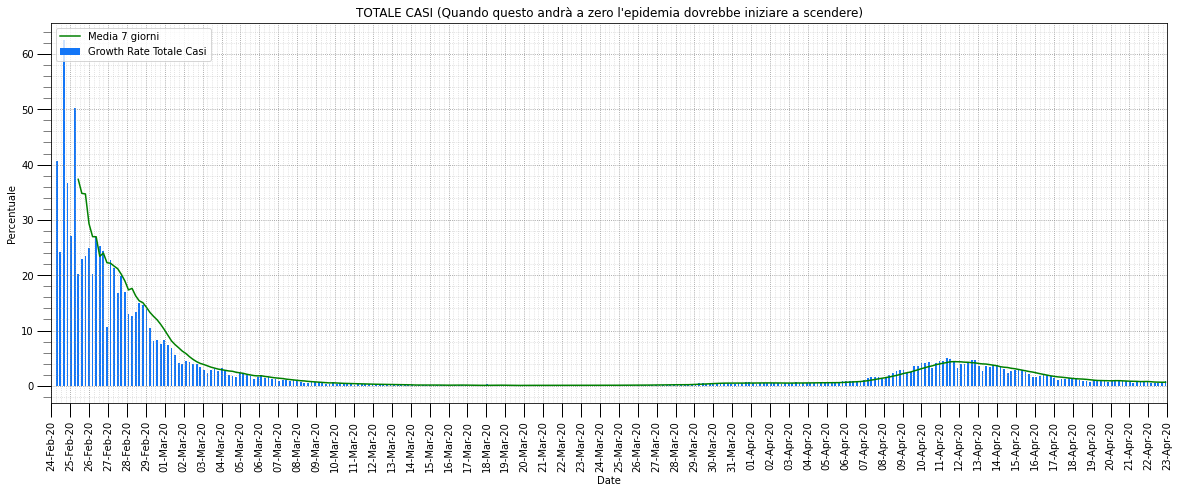

In [80]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

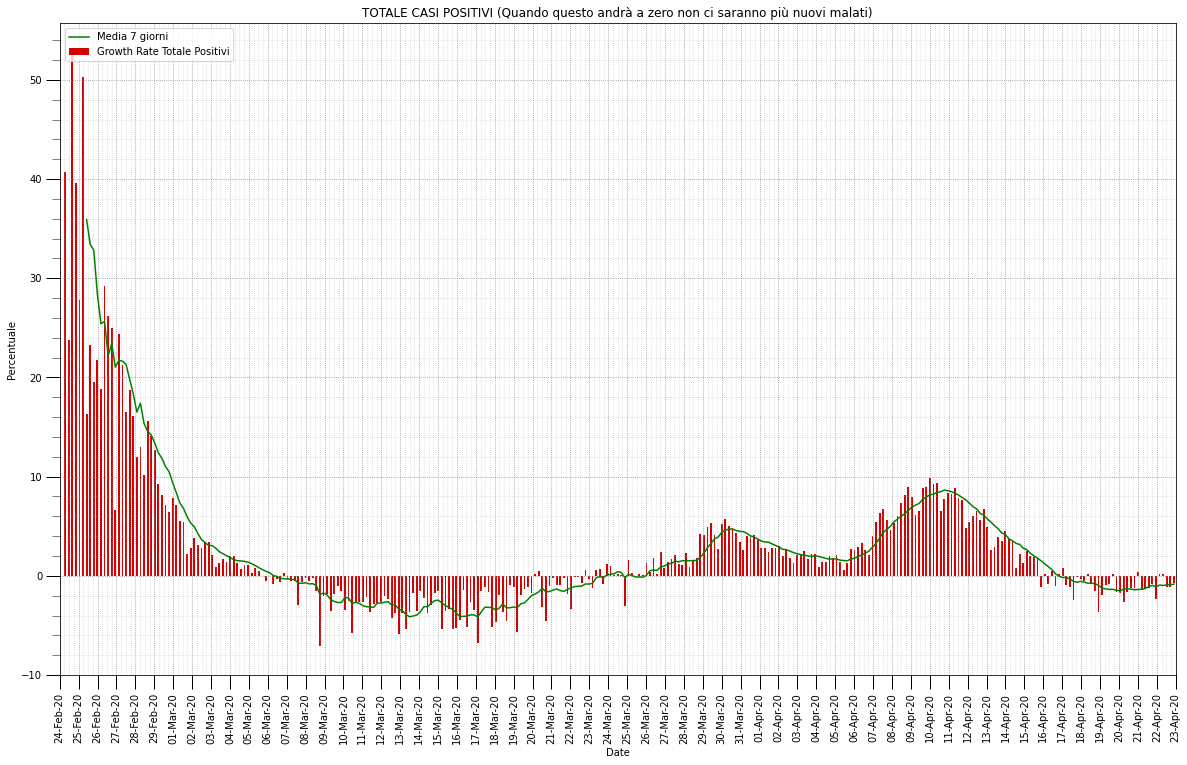

In [81]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


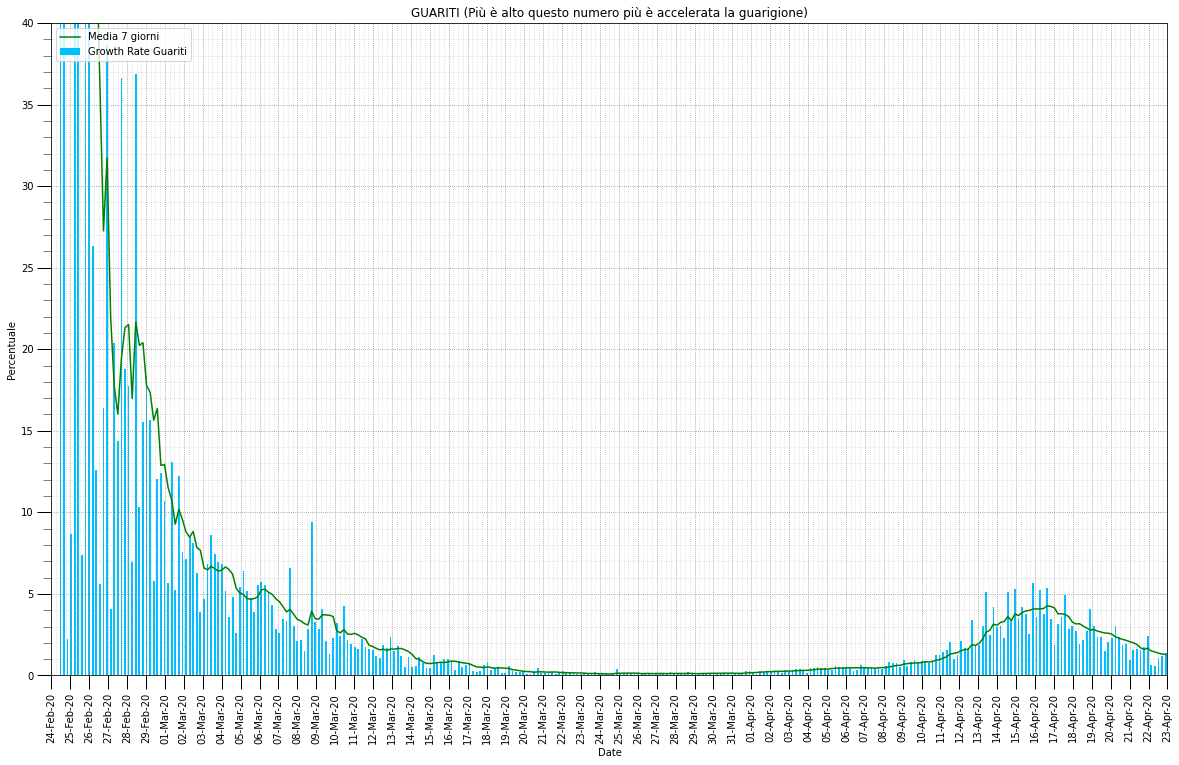

In [82]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

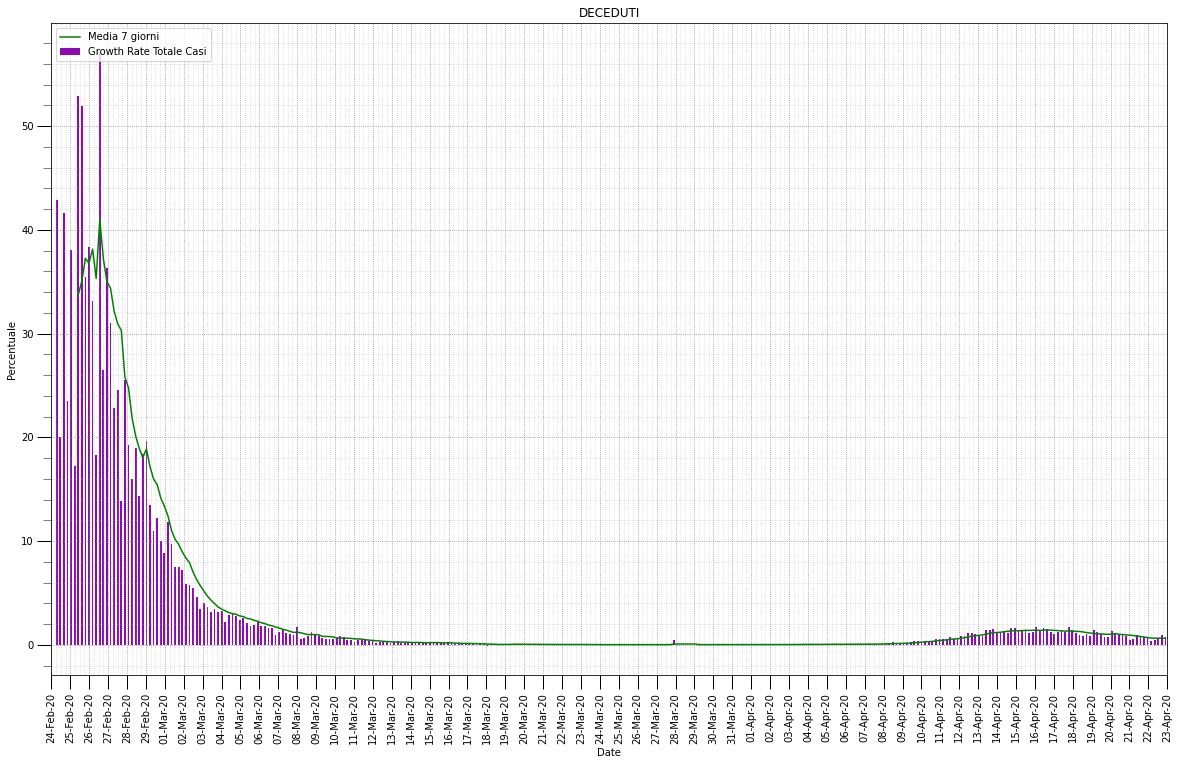

In [83]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [84]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [85]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
24-Dec-20       -2.64           -0.19                  -25.90   125.94   
25-Dec-20       -3.51           -0.03                  -68.67   169.80   
26-Dec-20       -0.86           -0.04                   11.04    87.30   
27-Dec-20        2.91            0.00                    6.26    87.49   
28-Dec-20        4.21           -0.17                  -80.24   171.02   
29-Dec-20       -2.41           -0.14                  -55.37   152.04   
30-Dec-20       -0.59           -0.13                  -26.02   123.19   

           DECEDUTI  
                     
24-Dec-20      2.80  
25-Dec-20      2.41  
26-Dec-20      2.57  
27-Dec-20      3.34  
28-Dec-20      5.19  
29-Dec-20      5.88  
30-Dec-20      3.55

### Percentuali totali

In [86]:
percents_in_period.tail(10)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
21-Dec-20  21-Dec-20                   -0.12              -0.11   
22-Dec-20  22-Dec-20                   -1.48              -0.33   
23-Dec-20  23-Dec-20                   -2.89              -0.45   
24-Dec-20  24-Dec-20                   -2.64              -0.19   
25-Dec-20  25-Dec-20                   -3.51              -0.03   
26-Dec-20  26-Dec-20                   -0.86              -0.04   
27-Dec-20  27-Dec-20                    2.91               0.00   
28-Dec-20  28-Dec-20                    4.21              -0.17   
29-Dec-20  29-Dec-20                   -2.41              -0.14   
30-Dec-20  30-Dec-20                   -0.59              -0.13   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
21-Dec-20                  -84.21           180.62      3.82  -453.82  
22-Dec-20                  -55.47           152.56      4.72    16.90  
23-Dec-20                  -47.99           147.35      3.98     6.40  
24-Dec-20                  -25.90           125.94      2.80    27.38  
25-Dec-20                  -68.67           169.80      2.41  -165.16  
26-Dec-20                   11.04            87.30      2.57   107.69  
27-Dec-20                    6.26            87.49      3.34   -22.71  
28-Dec-20                  -80.24           171.02      5.19  -900.37  
29-Dec-20                  -55.37           152.04      5.88     0.70  
30-Dec-20                  -26.02           123.19      3.55    33.27

**Le percentuali dall'inizio dell'epidemia**

In [87]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [88]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
24-Dec-20        1.20            0.13                   28.22    66.93   
25-Dec-20        1.15            0.13                   27.31    67.89   
26-Dec-20        1.14            0.13                   27.22    67.99   
27-Dec-20        1.15            0.13                   27.13    68.08   
28-Dec-20        1.16            0.12                   26.69    68.51   
29-Dec-20        1.14            0.12                   26.24    68.96   
30-Dec-20        1.13            0.12                   25.83    69.38   

           DECEDUTI  
                     
24-Dec-20      3.53  
25-Dec-20      3.52  
26-Dec-20      3.51  
27-Dec-20      3.51  
28-Dec-20      3.52  
29-Dec-20      3.53  
30-Dec-20      3.53

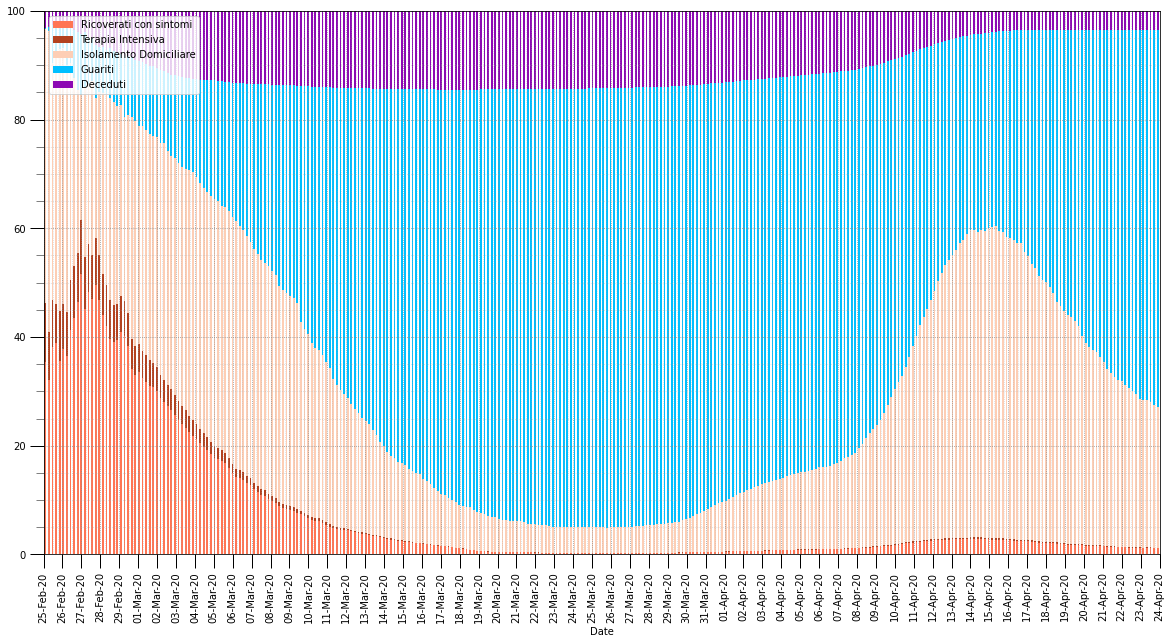

In [89]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 10]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [90]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [91]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [92]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [93]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti','nuovi_attualmente_positivi']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



### Totale Casi per Regione

In [94]:
regional_datas['totale_casi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
30-Dec-20    34858       10679     23518    188119          169396   

           Friuli Venezia Giulia   Lazio  Liguria  Lombardia  Marche  
data                                                                  
30-Dec-20                  49150  161284    59997     475044   40921

In [95]:
regional_datas['totale_casi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
30-Dec-20    6440         29234        21520    196461   89303     30745   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
30-Dec-20    92345   119696   28660           7244  249075

### Nuovi Casi Per Regione

In [96]:
incremental_data_regional = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

n = regional_datas['totale_casi']
for c in n.columns:
    incremental_data_regional[c] = n[c] - n[c].shift(1)
    incremental_data_regional[c] = incremental_data_regional[c].astype(pd.Int64Dtype())

incremental_data_regional = incremental_data_regional[1:]

In [97]:

incremental_data_regional.iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
24-Dec-20      223         155       244      1156            1691   
25-Dec-20      339          69       257      1009            2127   
26-Dec-20       34          25       237       539            1754   
27-Dec-20       25           9       179       310            1283   
28-Dec-20       37          17       212       433             750   
29-Dec-20       47          68       163       625             892   
30-Dec-20      278         113       449       930            1427   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
24-Dec-20                    831   1519      328       2656     415  
25-Dec-20                    584   1691      445       2628     603  
26-Dec-20                    224   1123       34       1606     206  
27-Dec-20                    144    977       99        466     181  
28-Dec-20                    187    966      173        573     131  
29-Dec-20                    493   1218      305        843     508  
30-Dec-20                    803   1333      415       1673     585

In [98]:

incremental_data_regional.iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
24-Dec-20     115           142          238      1057    1458       331   
25-Dec-20      68           182          154       875    1011       409   
26-Dec-20      28            24          124       417     544       173   
27-Dec-20       1            57           86       470     221        96   
28-Dec-20       7           120           99       313     645       156   
29-Dec-20       7            91          175       840     749       116   
30-Dec-20      44           220          197      1046    1470       328   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
24-Dec-20      853      563     192             35    3837  
25-Dec-20      720      613     232             11    5010  
26-Dec-20      337      402      51             24    2523  
27-Dec-20      682      227      36             27    3337  
28-Dec-20      650      181      88             61    2782  
29-Dec-20      995      271     161            -12    2655  
30-Dec-20     1084      460     347             14    2986

### Totale Attualmente Positivi per Regione

In [99]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
30-Dec-20    11036        5995      8731     77611           56057   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
30-Dec-20                  11647  74463     5628      52996   10572

In [100]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
30-Dec-20    2061         10602         1713     28959   52740     16325   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
30-Dec-20    33387     9737    3706            406   90023

### Nuovi Positivi per Regione

In [101]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
24-Dec-20     -325          71       117        62            -726   
25-Dec-20      173          13       170       538            1681   
26-Dec-20       18           4        32        16           -1693   
27-Dec-20      -69          -1        17      -488             888   
28-Dec-20     -271         -29       123      -779             123   
29-Dec-20     -273          24      -166      -805           -1486   
30-Dec-20     -236          41       196      -880            -755   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
24-Dec-20                   -173   -211     -219      -2331    -144  
25-Dec-20                    -18    583     -289        802     152  
26-Dec-20                     41    220        3        912      68  
27-Dec-20                     65    144       97       -295      36  
28-Dec-20                    -78   -368      -81      -4562      66  
29-Dec-20                   -335  -1385       71       -347     392  
30-Dec-20                   -130   -222     -131      -1422     443

In [102]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
24-Dec-20      64          -107           80     -1691     259        46   
25-Dec-20      30          1457           31     -3373     458       305   
26-Dec-20      27             2          -51        60     201        80   
27-Dec-20      -4            14           49      -495    -152        15   
28-Dec-20       4            27           46      -759    -481       -71   
29-Dec-20    -109            71          -61      -920    -324       -86   
30-Dec-20    -153           -76          -47      -424     -93        67   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
24-Dec-20     -234     -388     -27             -3     696  
25-Dec-20     -148      300      25              1  -16637  
26-Dec-20       58     -391       3            -10    1457  
27-Dec-20     -123      -78       4             14    1179  
28-Dec-20       79     -516       5             62     921  
29-Dec-20      163     -269      10            -81    -577  
30-Dec-20      -22     -278     138             -7    -342

### Terapia intensiva

In [103]:
regional_datas['terapia_intensiva'].iloc[-7:,:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
24-Dec-20       35           8        21       102             201   
25-Dec-20       34           7        21       102             206   
26-Dec-20       36           7        18        98             214   
27-Dec-20       36           5        18        95             210   
28-Dec-20       38           6        14        98             220   
29-Dec-20       38           6        16        97             221   
30-Dec-20       36           4        17       102             230   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
24-Dec-20                     56    293       64        521      64  
25-Dec-20                     54    290       64        522      60  
26-Dec-20                     56    297       66        513      64  
27-Dec-20                     58    301       66        508      65  
28-Dec-20                     56    307       61        512      60  
29-Dec-20                     60    305       63        498      61  
30-Dec-20                     59    303       63        481      62

In [104]:
regional_datas['terapia_intensiva'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
24-Dec-20       7            17           49       213     170        41   
25-Dec-20       7            19           49       214     166        43   
26-Dec-20       8            17           48       208     158        43   
27-Dec-20       8            20           45       211     154        43   
28-Dec-20       8            20           45       205     139        44   
29-Dec-20       8            22           46       196     136        45   
30-Dec-20      10            22           45       192     128        44   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
24-Dec-20      173      161      38              4     351  
25-Dec-20      174      166      36              4     346  
26-Dec-20      170      166      34              4     355  
27-Dec-20      174      165      36              2     360  
28-Dec-20      175      164      34              4     355  
29-Dec-20      169      157      38              1     366  
30-Dec-20      166      160      44              2     358

## Andamento per regione

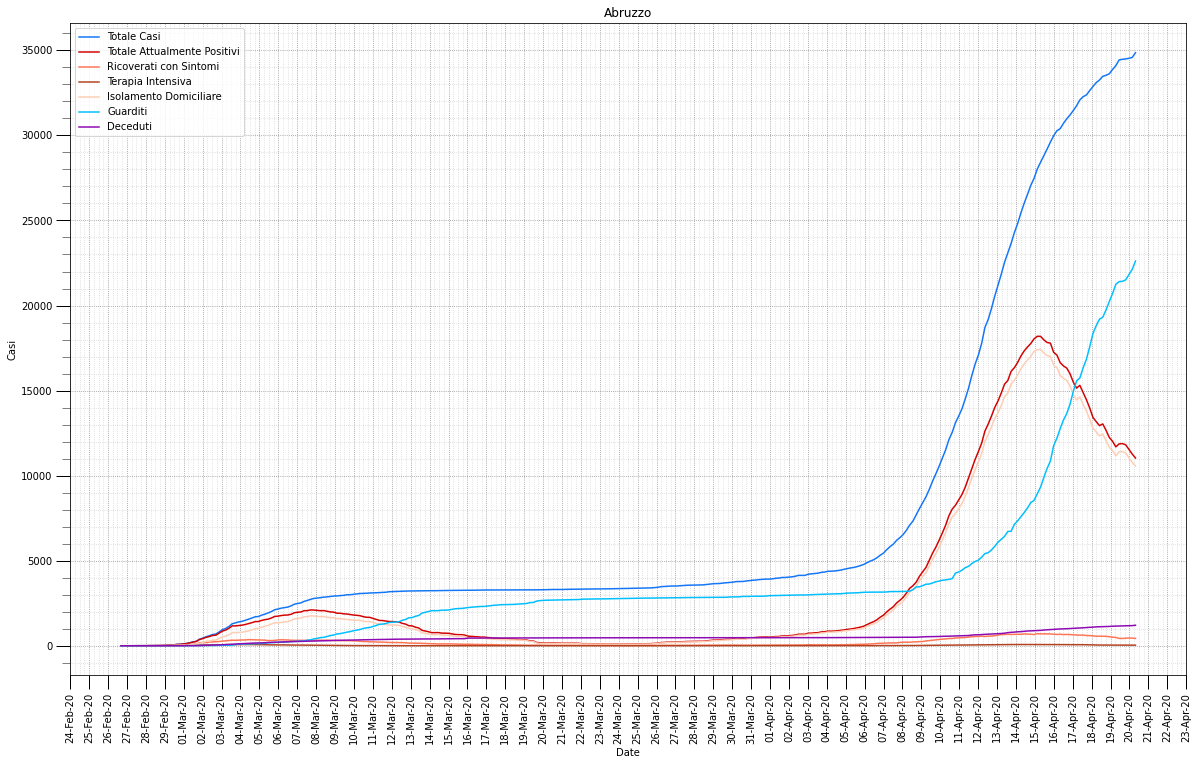

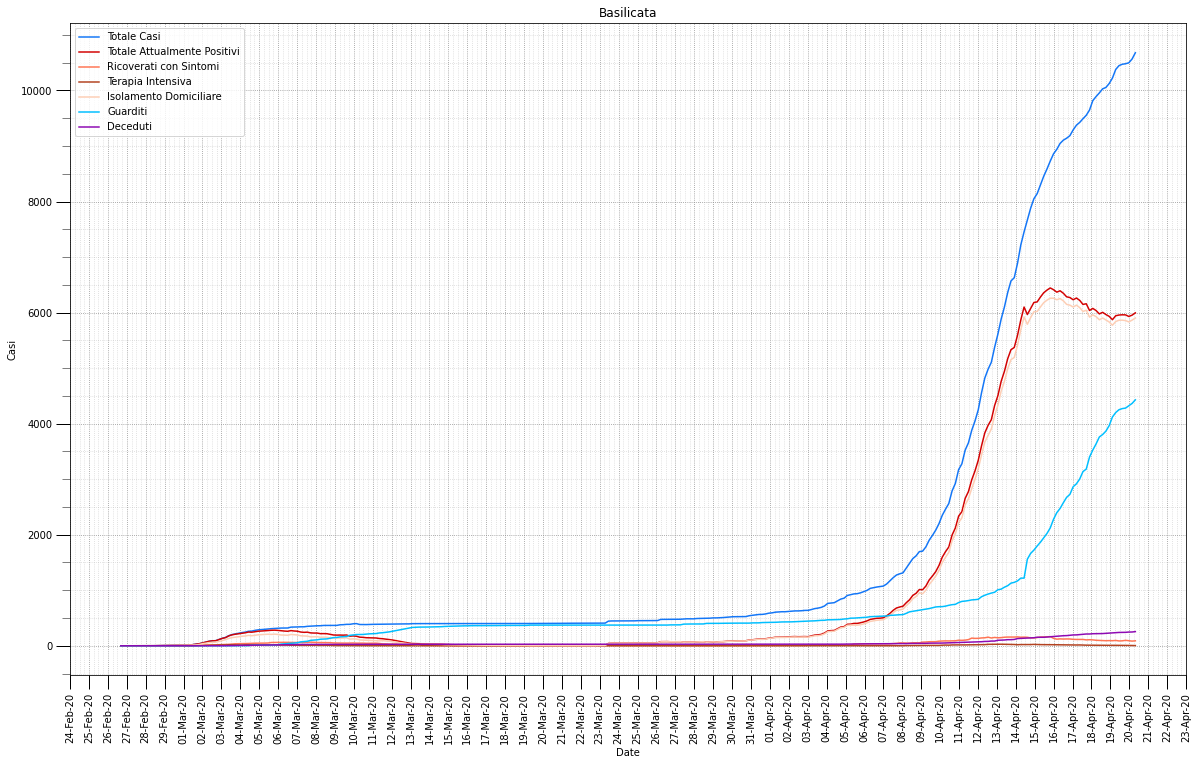

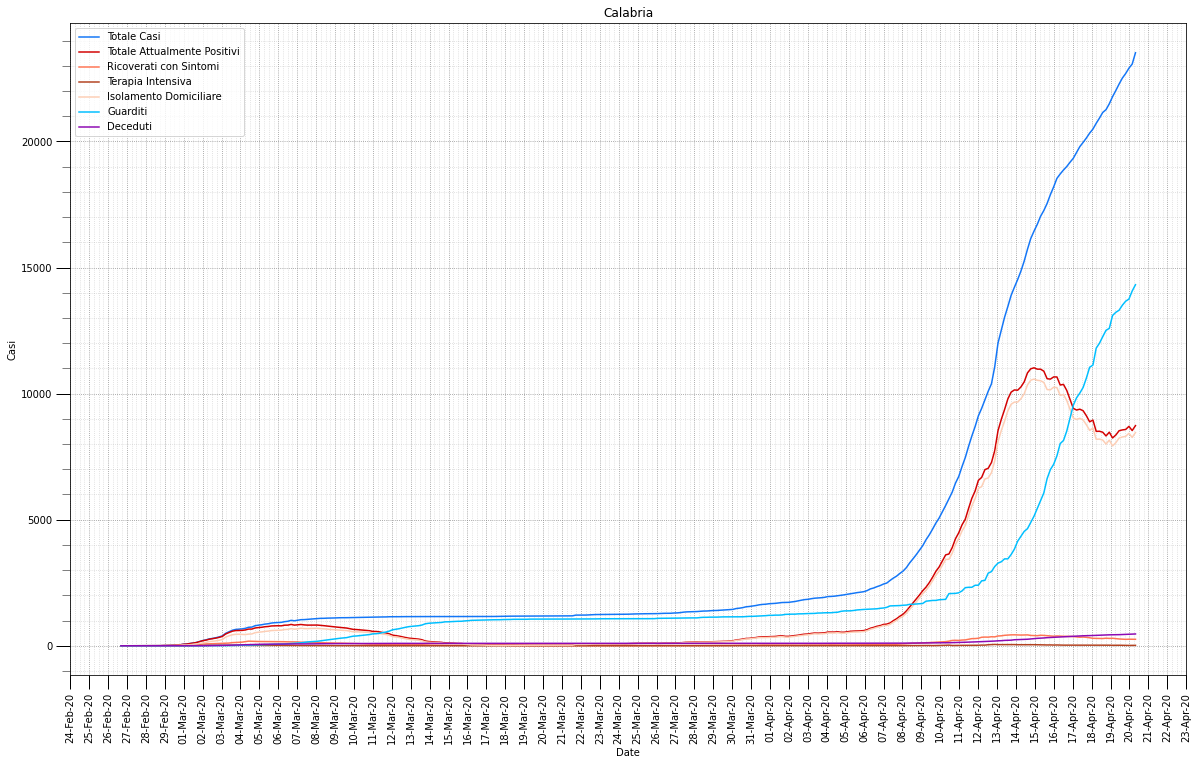

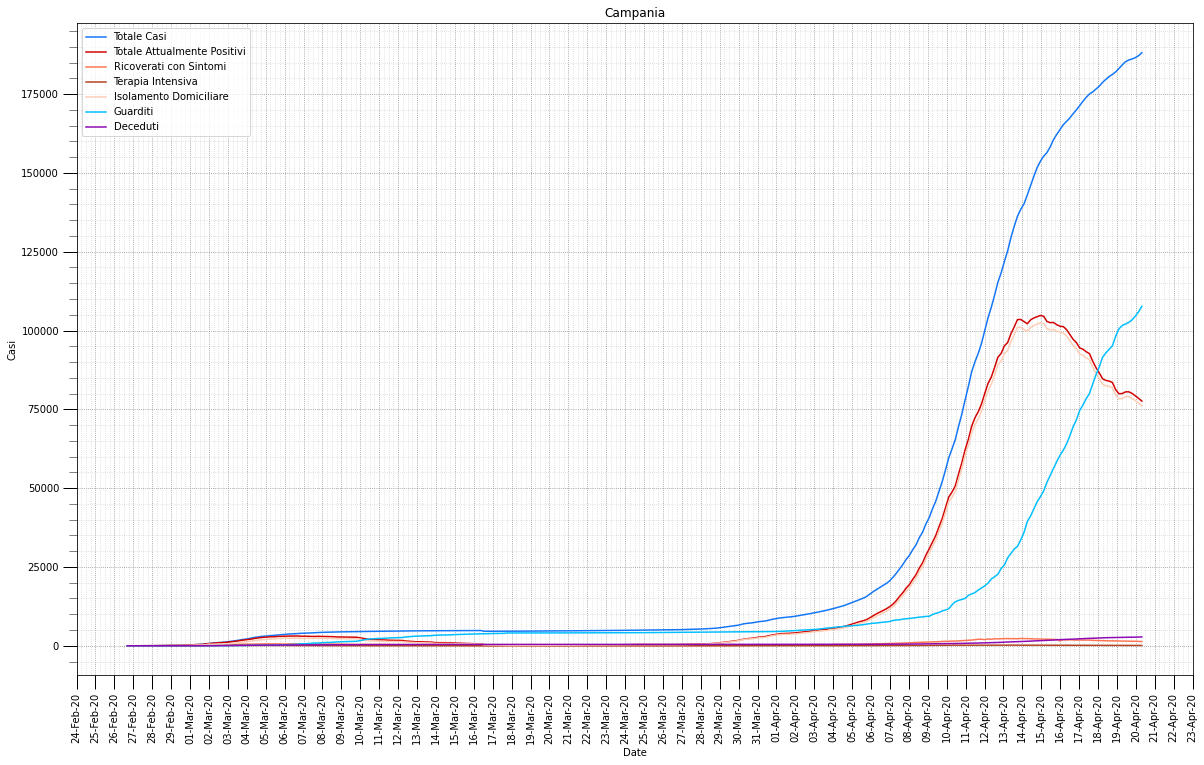

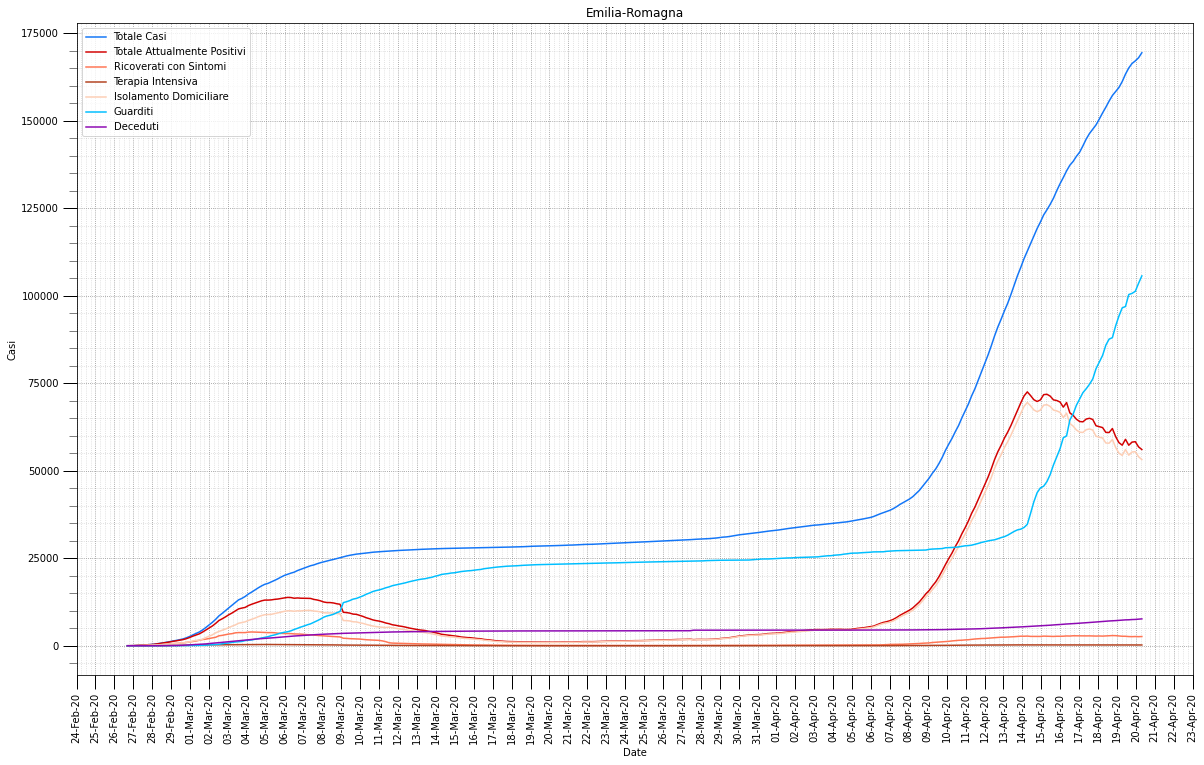

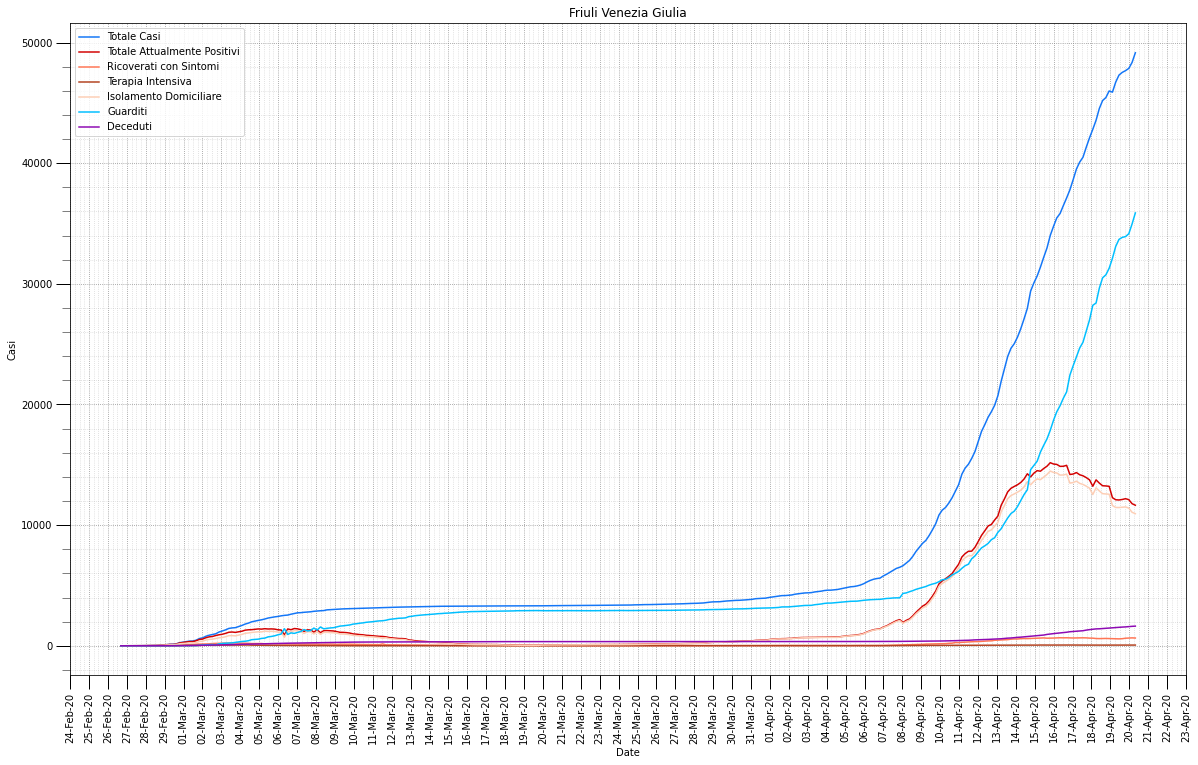

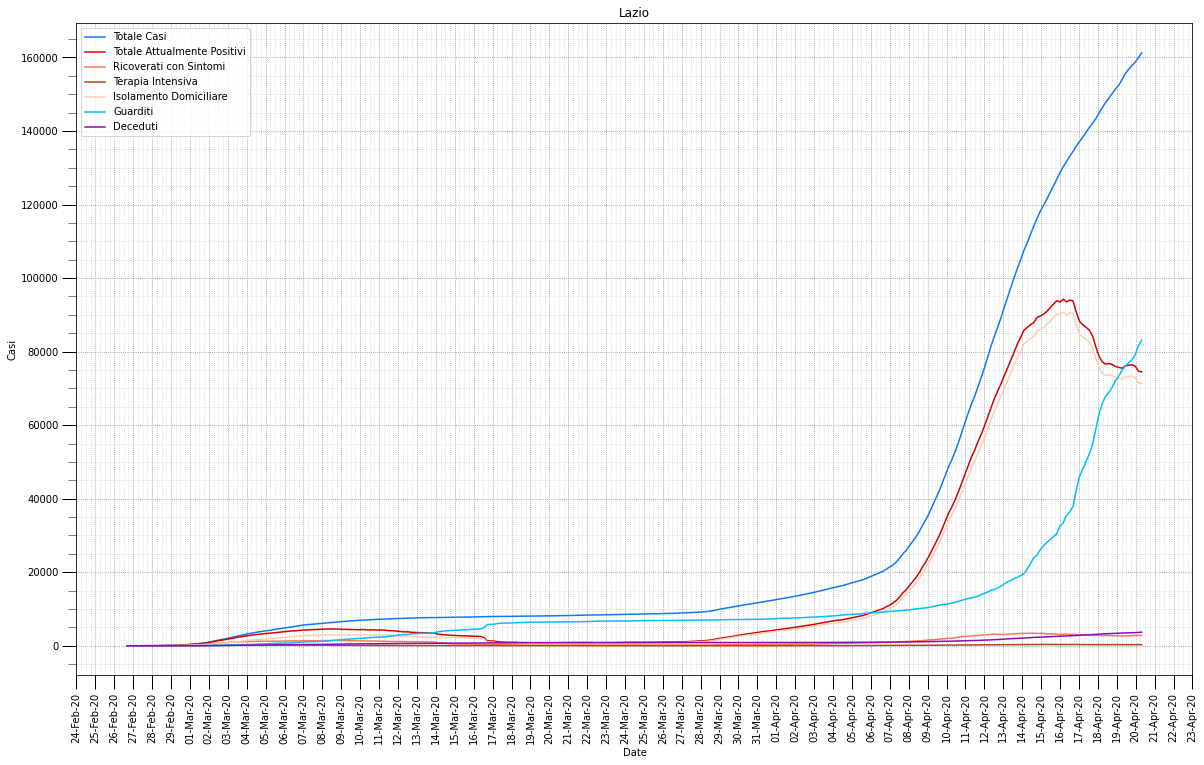

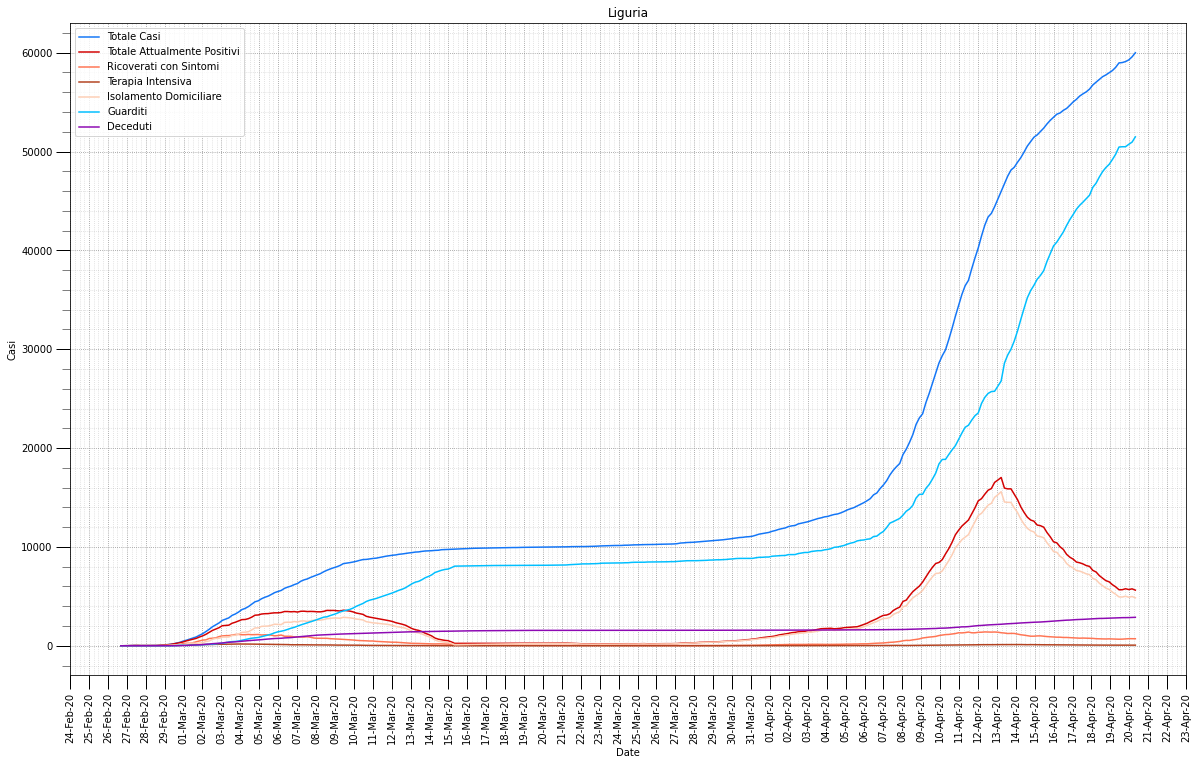

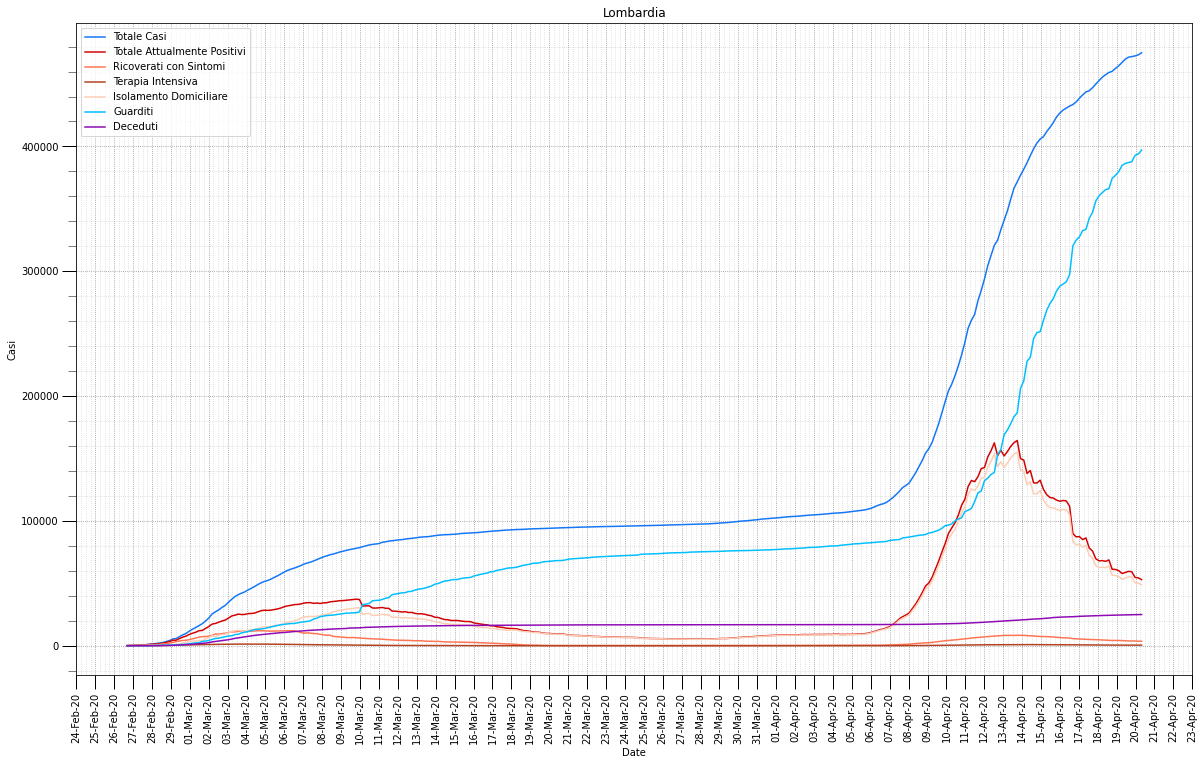

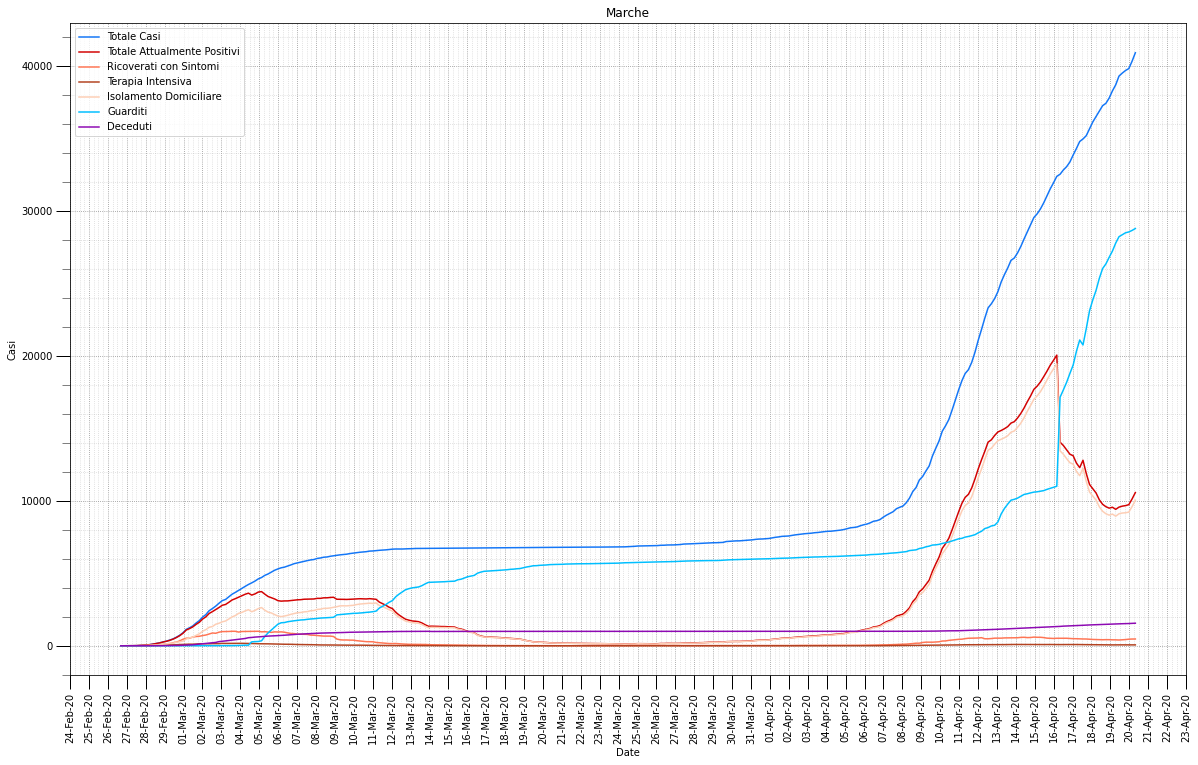

In [105]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

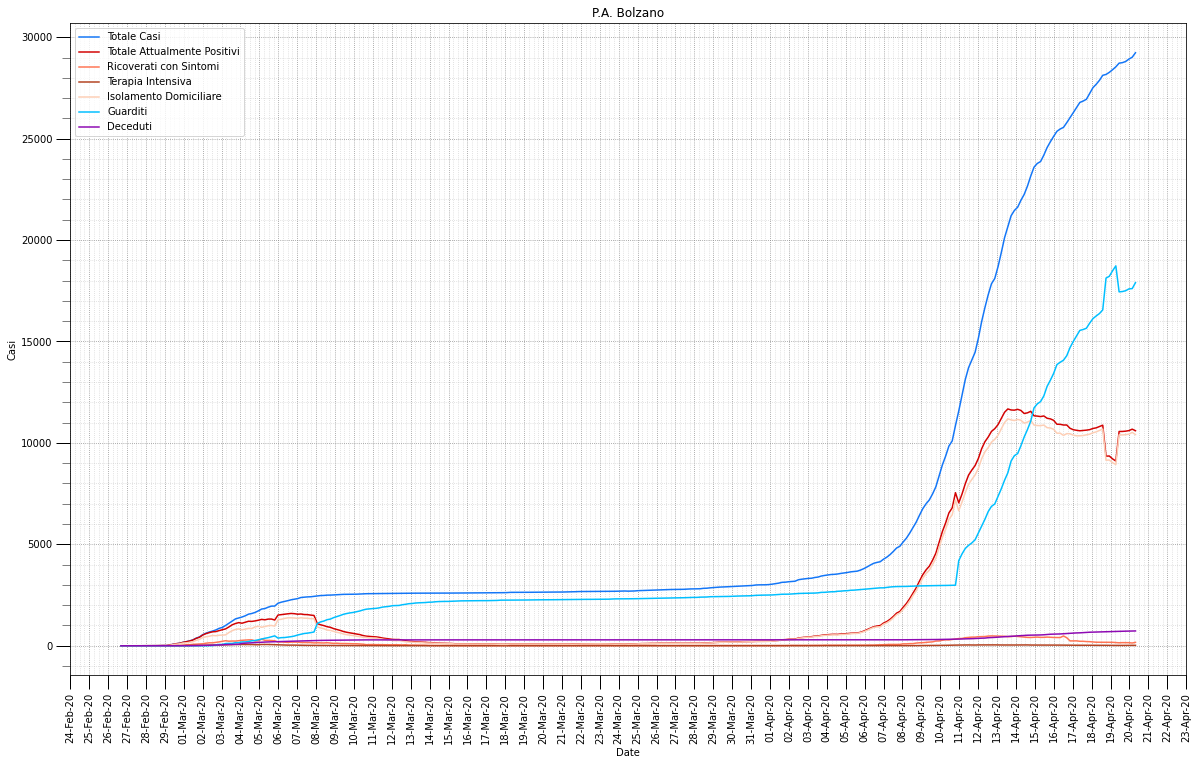

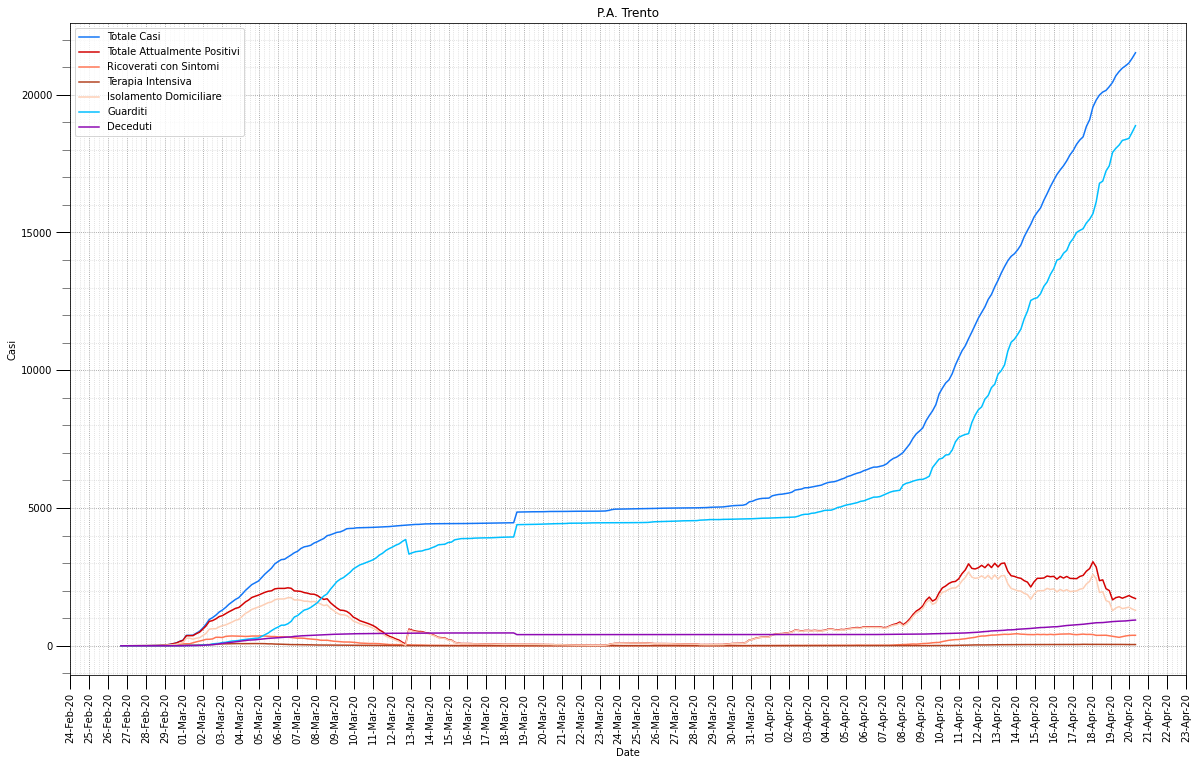

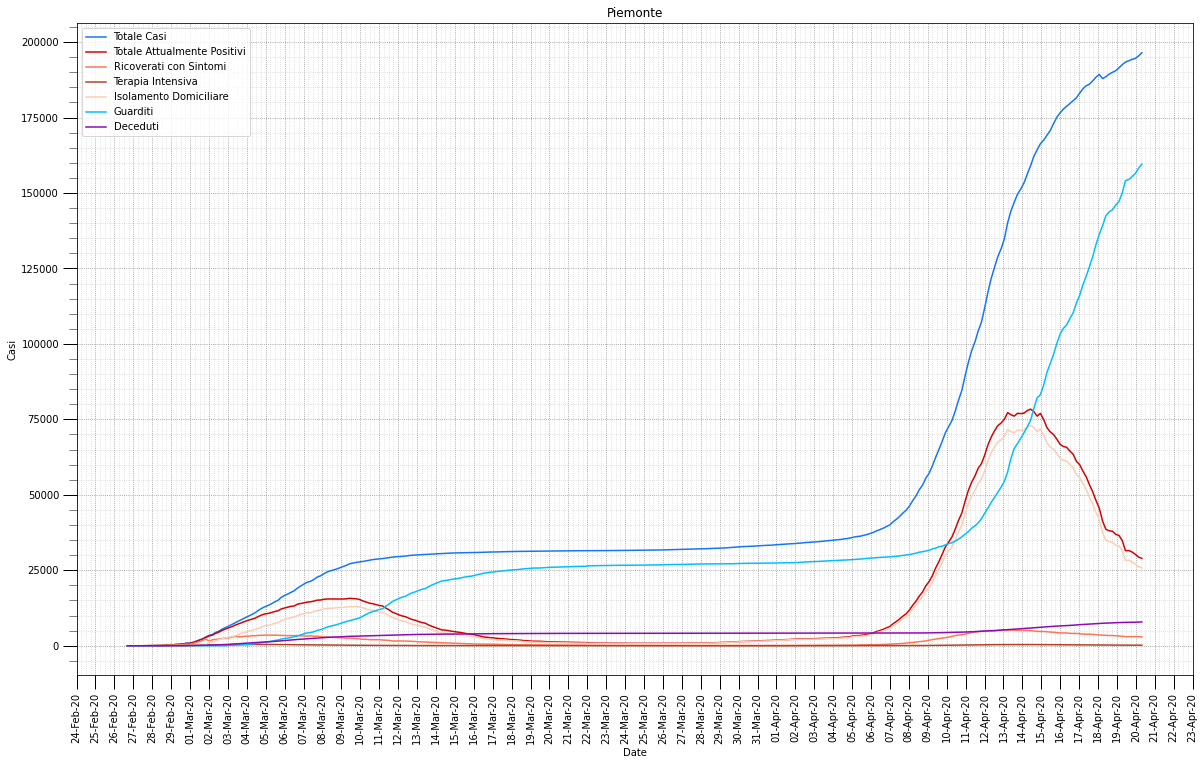

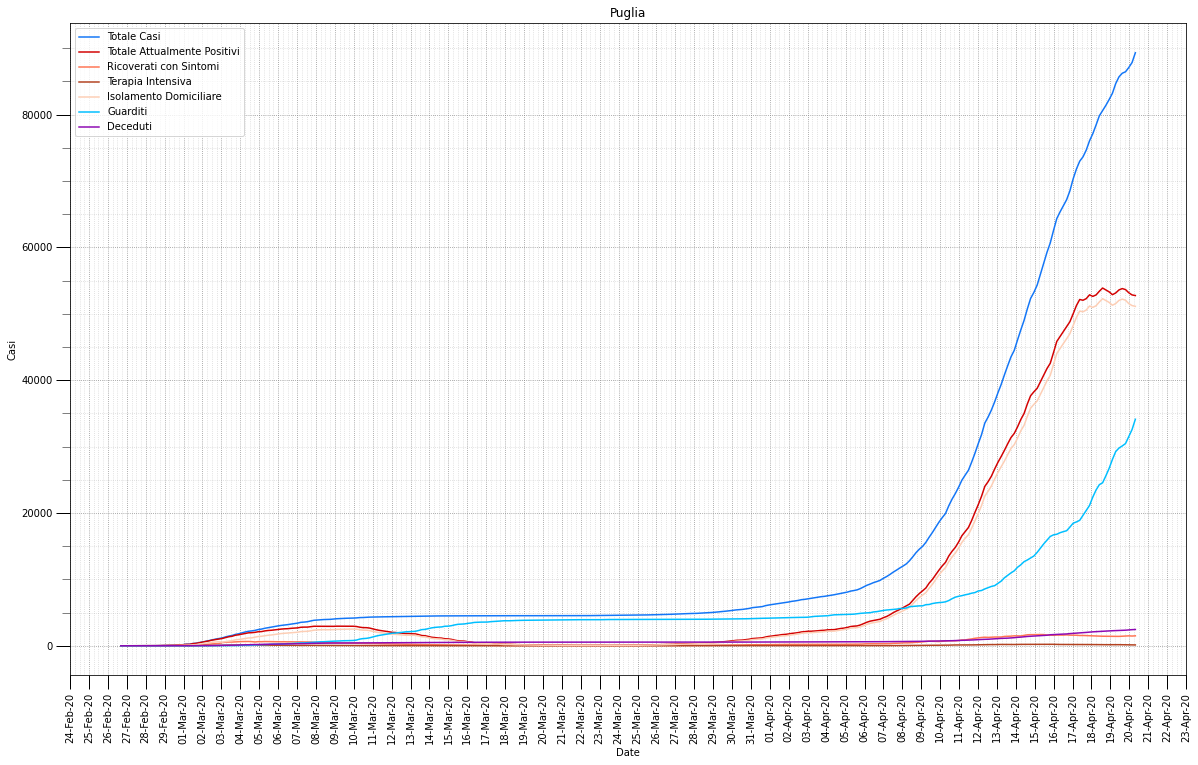

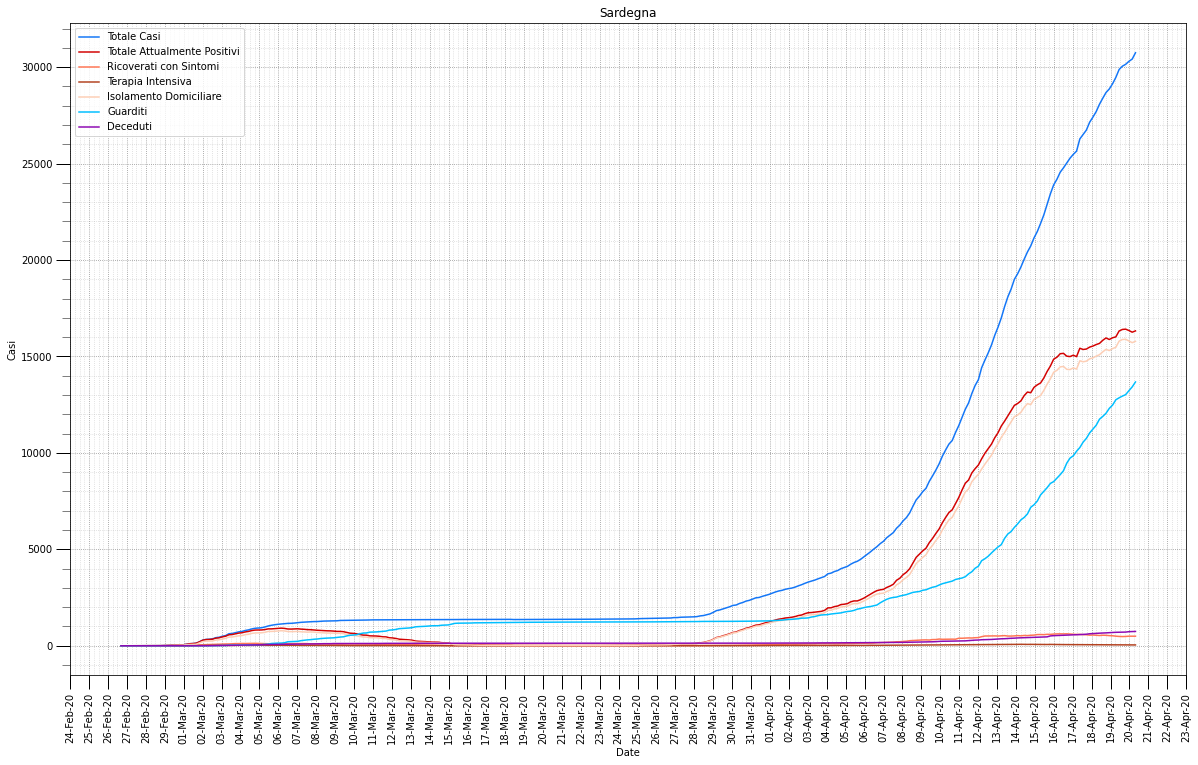

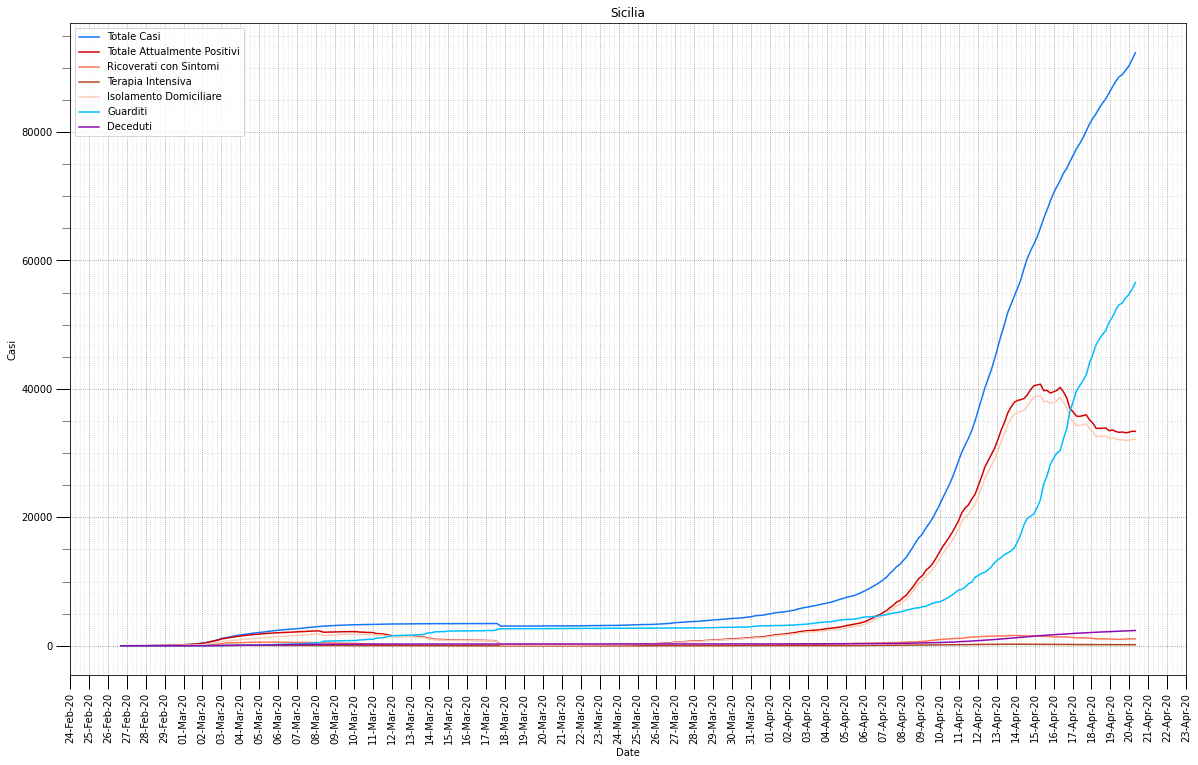

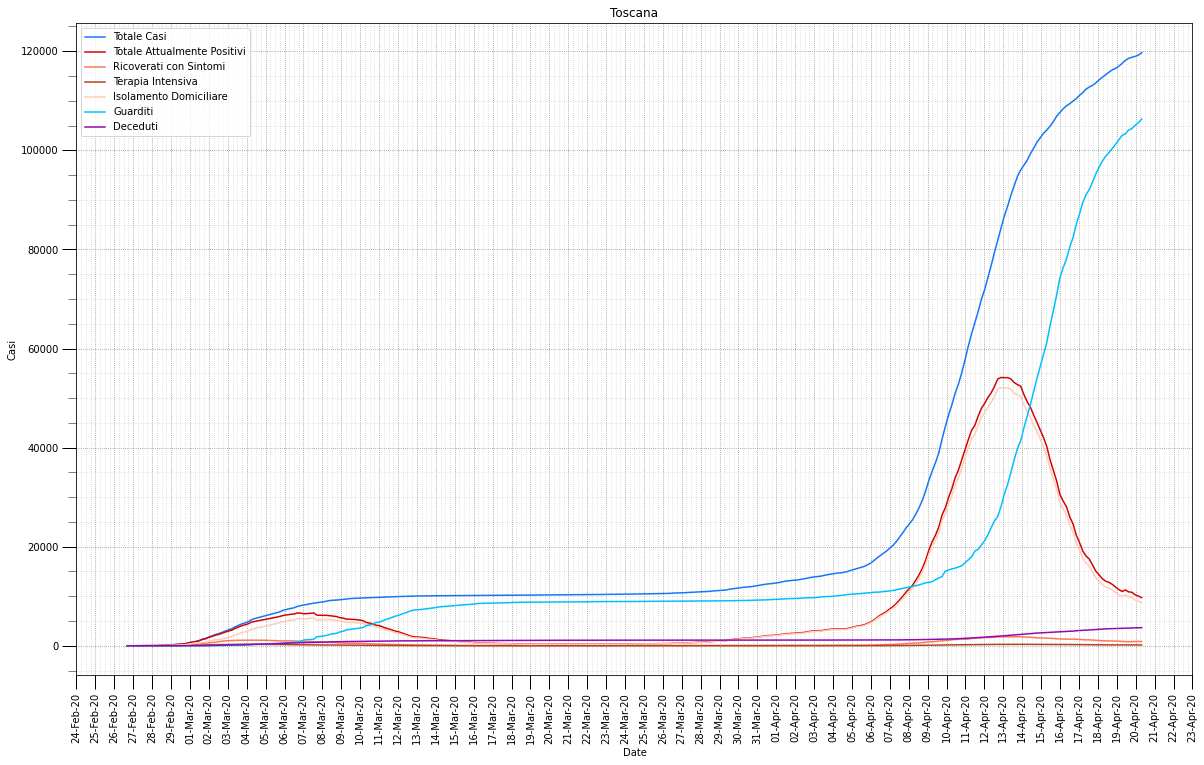

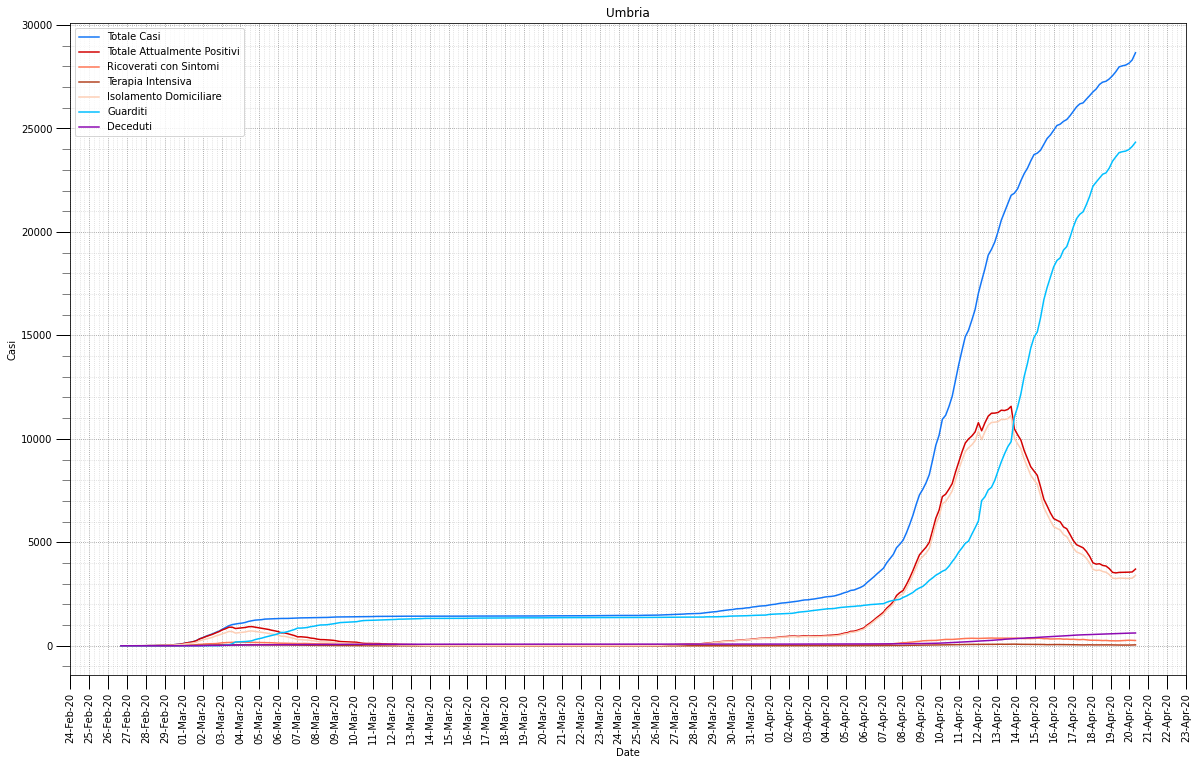

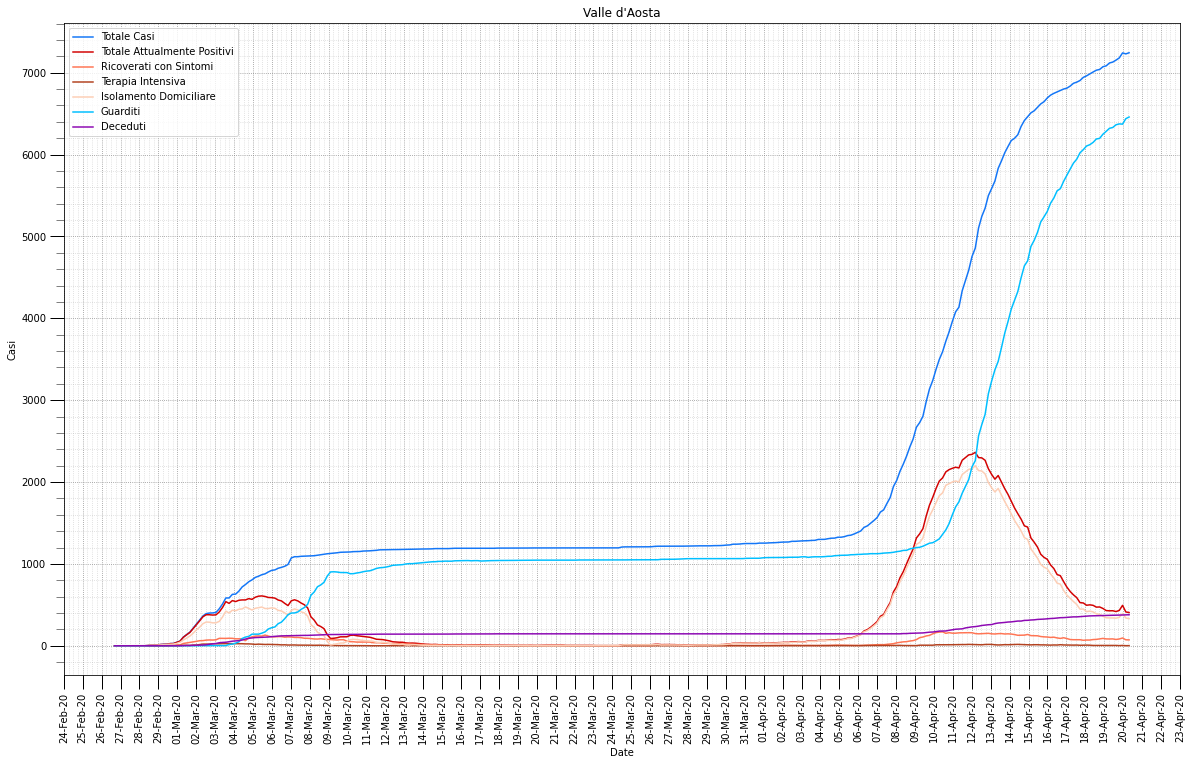

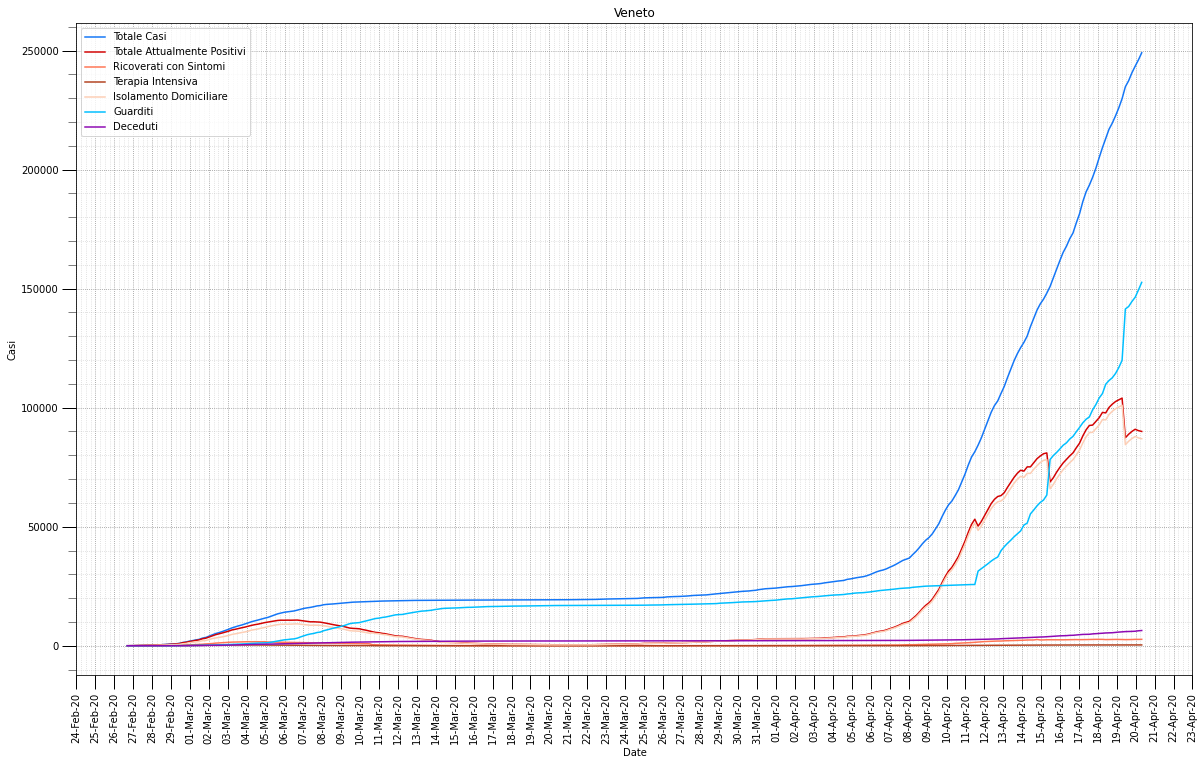

In [106]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)